In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import fitutils as fu

In [96]:
# Constantes

g = 9.81
rho_air = 1204
rho_fil = 1130

In [97]:
# Fonctions
def moy(positions, temps):
    if len(positions) != len(temps):
        raise ValueError("Les listes 'positions' et 'temps' doivent être de même taille.")
    temps_positions = {}   
    for pos, t in zip(positions, temps):
        if t in temps_positions:
            temps_positions[t]['somme_positions'] += pos
            temps_positions[t]['count'] += 1
        else:
            temps_positions[t] = {'somme_positions': pos, 'count': 1}    
    nv_temps = []
    pos_moy = []   
    for t in sorted(temps_positions):
        moyenne = temps_positions[t]['somme_positions'] / temps_positions[t]['count']
        nv_temps.append(t)
        pos_moy.append(moyenne)  
    return nv_temps, pos_moy

def enlev(tableau1, tableau2):
    set_tableau1 = {tuple(coord) for coord in tableau1}
    set_tableau2 = {tuple(coord) for coord in tableau2}
    set_resultat = set_tableau1 - set_tableau2
    resultat = np.array(list(set_resultat))
    return resultat

def sep(positionc, tempsc, ecart_max=10):
    sorted_data = sorted(zip(tempsc, positionc))
    tempsb, positionb = zip(*sorted_data)
    temps, position = moy(positionb, tempsb)
    positions_sep = []
    temps_sep = []
    temp_positions = [position[0]]
    temp_temps = [temps[0]]
    for i in range(1, len(position)):
        if np.abs(position[i] - position[i-1]) > ecart_max:
            positions_sep.append(temp_positions)
            temps_sep.append(temp_temps)
            temp_positions = [position[i]]
            temp_temps = [temps[i]]
        else:
            temp_positions.append(position[i])
            temp_temps.append(temps[i])
    positions_sep.append(temp_positions)
    temps_sep.append(temp_temps)
    return positions_sep, temps_sep

def ini(temps):
    premier_temps = temps[0]
    temps_ajustes = [t - premier_temps for t in temps]
    return temps_ajustes

def enlev(tableau1, tableau2):
    set_tableau1 = {tuple(coord) for coord in tableau1}
    set_tableau2 = {tuple(coord) for coord in tableau2}
    set_resultat = set_tableau1 - set_tableau2
    resultat = np.array(list(set_resultat))
    return resultat

def masse(dia_bulle, dia_fil=0.0001):
    return  ((np.pi * ((dia_fil/2)**2) ) * (dia_bulle * np.pi) * rho_fil)

## Nylon de 0,18 mm

In [98]:
# Taille des bulles :

tail3 = 223*19.05/(490*100)
tail4 = 216*19.05/(476*100)
tail5 = 215*19.05/(464*100)
tail6 = 217*19.05/(469*100)
tail7 = 200*19.05/(437*100)
tail8 = 150*19.05/(452*100)
tail10 = 216*19.05/(463*100)
tail11 = 214*19.05/(461.05*100)
tail12 = 156*19.05/(482*100)
tail13 = 156*19.05/(474*100)
tail14 = 72.06*19.05/(468*100)
tail15 = 72*19.05/(470*100)
tail16 = 69*19.05/(463*100)
tail17 = 69.03*19.05/(468*100)

print(tail3,tail4,tail5,tail6,tail7,tail8,tail10,tail11,tail12,tail13,tail14,tail15,tail16,tail17)

tab_1 = np.array([tail8, tail12,tail13])
tab_1_moy = np.mean (tab_1)
u_tab_1 = np.std(tab_1, ddof = 1)/np.sqrt(len(tab_1))
#print(tab_1_moy, u_tab_1)

tab_2 = np.array([tail3, tail4, tail5, tail6, tail7, tail10, tail11])
tab_2_moy = np.mean (tab_2)
u_tab_2 = np.std(tab_2, ddof = 1)/np.sqrt(len(tab_2))
#print(tab_2_moy, u_tab_2)

tab_3 = np.array([tail14, tail15, tail16, tail17])
tab_3_moy = np.mean (tab_3)
u_tab_3 = np.std(tab_3, ddof = 1)/np.sqrt(len(tab_3))
#print(tab_3_moy, u_tab_3)

0.08669693877551021 0.08644537815126051 0.08827047413793103 0.08814179104477612 0.08718535469107551 0.06321902654867256 0.08887257019438445 0.0884220800347034 0.06165560165975104 0.06269620253164557 0.029332115384615387 0.02918297872340426 0.028389848812095032 0.028098750000000002


In [99]:
# Echelles des posititons et des temps

echpos3 = 28.85/(758*100)
echpos4 = 28.85/(728*100)
echpos5 = 28.85/(732*100)
echpos6 = 28.85/(727*100)
echpos7 = 28.85/(697*100)
echpos8 = 28.85/(697.5*100)
echpos10 = 28.85/(737*100)
echpos11 = 28.85/(761*100)
echpos12 = 28.85/(717*100)
echpos13 = 28.85/(735*100)
echpos14 = 28.85/(706*100)
echpos15 = 28.85/(726*100)
echpos16 = 28.85/(727*100)
echpos17 = 28.85/(717*100)


echtps3 = 13/403
echtps4 = 42/1253
echtps5 = 40/1201
echtps6 = 46/1391
echtps7 = 52/1573
echtps8 = 76/2229
echtps10 = 28/845
echtps11 = 44/1350
echtps12 = 26/801
echtps13 = 50/1494
echtps14 = 64/1914
echtps15 = 5/488
echtps16 = 57/1719
echtps17 = 40/1194

In [100]:
# Code bulles 3 - 10
 
df3 = pd.read_csv('Mesure_bulle/ResultsBulle3.csv')
array3 = df3.to_numpy()
tab3 = np.array(array3[:, 5:7])
tps3 = tab3[:, 0]*echtps3
pos3 = (tab3[:, 1]*echpos3 - tab_1_moy)

tab3 = sep(pos3, tps3, ecart_max=0.01)
pos31 = tab3[0][0]
pos32 = tab3[0][1]
pos33 = tab3[0][2]
pos34 = tab3[0][3]
pos35 = tab3[0][4]
pos36 = tab3[0][5]
pos37 = tab3[0][6]
pos38 = tab3[0][7]
pos39 = tab3[0][8]
pos310 = tab3[0][9]
pos311 = tab3[0][10]
pos312 = tab3[0][11]
pos313 = tab3[0][12]
pos314 = tab3[0][13]
pos315 = tab3[0][14]
tps31 = ini(tab3[1][0])
tps32 = ini(tab3[1][1])
tps33 = ini(tab3[1][2])
tps34 = ini(tab3[1][3])
tps35 = ini(tab3[1][4])
tps36 = ini(tab3[1][5])
tps37 = ini(tab3[1][6])
tps38 = ini(tab3[1][7])
tps39 = ini(tab3[1][8])
tps310 = ini(tab3[1][9])
tps311 = ini(tab3[1][10])
tps312 = ini(tab3[1][11])
tps313 = ini(tab3[1][12])
tps314 = ini(tab3[1][13])
tps315 = ini(tab3[1][14])



df4 = pd.read_csv('Mesure_bulle/ResultsBulle4.csv')
array4 = df4.to_numpy()
tab4 = np.array(array4[:, 5:7])
tps4 = tab4[:, 0]*echtps4
pos4 = (tab4[:, 1]*echpos4 - tab_2_moy)

tab4 = sep(pos4, tps4, ecart_max=0.1)
pos41 = tab4[0][0]
pos42 = tab4[0][1]
pos43 = tab4[0][2]
pos44 = tab4[0][3]
tps41 = ini(tab4[1][0])
tps42 = ini(tab4[1][1])
tps43 = ini(tab4[1][2])
tps44 = ini(tab4[1][3])


df5 = pd.read_csv('Mesure_bulle/ResultsBulle5.csv')
array5 = df5.to_numpy()
tab5 = np.array(array5[:, 5:7])
tps5 = tab5[:, 0]*echtps5
pos5 = (tab5[:, 1]*echpos5 - tab_2_moy)

tab5 = sep(pos5, tps5, ecart_max=0.1)
pos51 = tab5[0][0]
pos52 = tab5[0][1]
pos53 = tab5[0][2]
pos54 = tab5[0][3]
tps51 = ini(tab5[1][0])
tps52 = ini(tab5[1][1])
tps53 = ini(tab5[1][2])
tps54 = ini(tab5[1][3])


df6 = pd.read_csv('Mesure_bulle/ResultsBulle6.csv')
array6 = df6.to_numpy()
tab6 = np.array(array6[:, 5:7])
tps6 = tab6[:, 0]*echtps6
pos6 = (tab6[:, 1]*echpos6 - tab_2_moy)

tab6 = sep(pos6, tps6, ecart_max=0.1)
pos61 = tab6[0][0]
pos62 = tab6[0][1]
pos63 = tab6[0][2]
pos64 = tab6[0][3]
pos65 = tab6[0][4]
tps61 = ini(tab6[1][0])
tps62 = ini(tab6[1][1])
tps63 = ini(tab6[1][2])
tps64 = ini(tab6[1][3])
tps65 = ini(tab6[1][4])


df7 = pd.read_csv('Mesure_bulle/ResultsBulle7.csv')
array7 = df7.to_numpy()
tab7 = np.array(array7[:, 5:7])
tps7 = tab7[:, 0]*echtps7
pos7 = (tab7[:, 1]*echpos7 - tab_2_moy)

tab7 = sep(pos7, tps7, ecart_max=0.1)
pos71 = tab7[0][0]
pos72 = tab7[0][1]
pos73 = tab7[0][2]
pos74 = tab7[0][3]
pos75 = tab7[0][4]
pos76 = tab7[0][5]
pos77 = tab7[0][6]
tps71 = ini(tab7[1][0])
tps72 = ini(tab7[1][1])
tps73 = ini(tab7[1][2])
tps74 = ini(tab7[1][3])
tps75 = ini(tab7[1][4])
tps76 = ini(tab7[1][5])
tps77 = ini(tab7[1][6])


df8 = pd.read_csv('Mesure_bulle/ResultsBulle8.csv')
array8 = df8.to_numpy()
tab8 = np.array(array8[:, 5:7])
tps8 = tab8[:, 0]*echtps8
pos8 = (tab8[:, 1]*echpos8  - tab_1_moy)

tab8 = sep(pos8, tps8, ecart_max=0.1)
pos81 = tab8[0][0]
pos82 = tab8[0][1]
pos83 = tab8[0][2]
pos84 = tab8[0][3]
pos85 = tab8[0][4]
pos86 = tab8[0][5]
pos87 = tab8[0][6]
pos88 = tab8[0][7]
pos89 = tab8[0][8]
pos810 = tab8[0][9]
tps81 = ini(tab8[1][0])
tps82 = ini(tab8[1][1])
tps83 = ini(tab8[1][2])
tps84 = ini(tab8[1][3])
tps85 = ini(tab8[1][4])
tps86 = ini(tab8[1][5])
tps87 = ini(tab8[1][6])
tps88 = ini(tab8[1][7])
tps89 = ini(tab8[1][8])
tps810 = ini(tab8[1][9])


df10 = pd.read_csv('Mesure_bulle/ResultsBulle10.csv')
array10 = df10.to_numpy()
tab10 = np.array(array10[:, 5:7])
tps10 = tab10[:, 0]*echtps8
pos10 = (tab10[:, 1]*echpos8 - tab_2_moy)

tab10 = sep(pos10, tps10, ecart_max=0.1)
pos101 = tab10[0][0]
pos102 = tab10[0][1]
pos103 = tab10[0][2]
tps101 = ini(tab10[1][0])
tps102 = ini(tab10[1][1])
tps103 = ini(tab10[1][2])

In [101]:
# Code bulles 11 - 17
 
df11 = pd.read_csv('Mesure_bulle/ResultsBulle11.csv')
array11 = df11.to_numpy()
tab11 = np.array(array11[:, -2:])
tps11 = tab11[:, 0]*echtps11
pos11 = ((524 - tab11[:, 1])*echpos11 - tab_2_moy)

tab11 = sep(pos11, tps11, ecart_max=0.1)
pos111 = tab11[0][0]
pos112 = tab11[0][1]
pos113 = tab11[0][2]
pos114 = tab11[0][3]
pos115 = tab11[0][4]
tps111 = ini(tab11[1][0])
tps112 = ini(tab11[1][1])
tps113 = ini(tab11[1][2])
tps114 = ini(tab11[1][3])
tps115 = ini(tab11[1][4])


df12 = pd.read_csv('Mesure_bulle/ResultsBulle12.csv')
array12 = df12.to_numpy()
tab12 = np.array(array12[:, 5:7])
tps12 = tab12[:, 0]*echtps12
pos12 = ((707 - tab12[:, 1])*echpos12 - tab_1_moy)

tab12 = sep(pos12, tps12, ecart_max=0.1)
pos121 = tab12[0][0]
pos122 = tab12[0][1]
pos123 = tab12[0][2]
pos124 = tab12[0][3]
tps121 = ini(tab12[1][0])
tps122 = ini(tab12[1][1])
tps123 = ini(tab12[1][2])
tps124 = ini(tab12[1][3])


df13 = pd.read_csv('Mesure_bulle/ResultsBulle13.csv')
array13 = df13.to_numpy()
tab13 = np.array(array13[:, 5:7])
tps13 = tab13[:, 0]*echtps13
pos13 = ((584 - tab13[:, 1])*echpos13 - tab_1_moy)

tab13 = sep(pos13, tps13, ecart_max=0.1)
pos131 = tab13[0][0]
pos132 = tab13[0][1]
pos133 = tab13[0][2]
pos134 = tab13[0][3]
pos135 = tab13[0][4]
pos136 = tab13[0][5]
tps131 = ini(tab13[1][0])
tps132 = ini(tab13[1][1])
tps133 = ini(tab13[1][2])
tps134 = ini(tab13[1][3])
tps135 = ini(tab13[1][4])
tps136 = ini(tab13[1][5])


df14 = pd.read_csv('Mesure_bulle/ResultsBulle14.csv')
array14 = df14.to_numpy()
tab14 = np.array(array14[:, 5:7])
tps14 = tab14[:, 0]*echtps14
pos14 = ((576 - tab14[:, 1])*echpos14 - tab_3_moy)

tab14 = sep(pos14, tps14, ecart_max=0.1)
pos141 = tab14[0][0]
pos142 = tab14[0][1]
pos143 = tab14[0][2]
pos144 = tab14[0][3]
pos145 = tab14[0][4]
pos146 = tab14[0][5]
pos147 = tab14[0][6]
tps141 = ini(tab14[1][0])
tps142 = ini(tab14[1][1])
tps143 = ini(tab14[1][2])
tps144 = ini(tab14[1][3])
tps145 = ini(tab14[1][4])
tps146 = ini(tab14[1][5])
tps147 = ini(tab14[1][6])


df16 = pd.read_csv('Mesure_bulle/ResultsBulle16.csv')
array16 = df16.to_numpy()
tab16 = np.array(array16[:, 5:7])
tps16 = tab16[:, 0]*echtps16
pos16 = ((688 - tab16[:, 1])*echpos16  - tab_3_moy)

tab16 = sep(pos16, tps16, ecart_max=0.1)
pos161 = tab16[0][0][1:]
pos162 = tab16[0][1]
pos163 = tab16[0][2]
pos164 = tab16[0][3]
pos165 = tab16[0][4]
tps161 = ini(tab16[1][0][1:])
tps162 = ini(tab16[1][1])
tps163 = ini(tab16[1][2])
tps164 = ini(tab16[1][3])
tps165 = ini(tab16[1][4])


df17 = pd.read_csv('Mesure_bulle/ResultsBulle17.csv')
array17 = df17.to_numpy()
tab17 = np.array(array17[:, -2:])
tps17 = tab17[:, 0]*echtps17
pos17 = ((744 - tab17[:, 1])*echpos17 - tab_3_moy)

tab17 = sep(pos17, tps17, ecart_max=0.1)
pos171 = tab17[0][0]
pos172 = tab17[0][1]
pos173 = tab17[0][2]
pos174 = tab17[0][3]
tps171 = ini(tab17[1][0])
tps172 = ini(tab17[1][1])
tps173 = ini(tab17[1][2])
tps174 = ini(tab17[1][3])

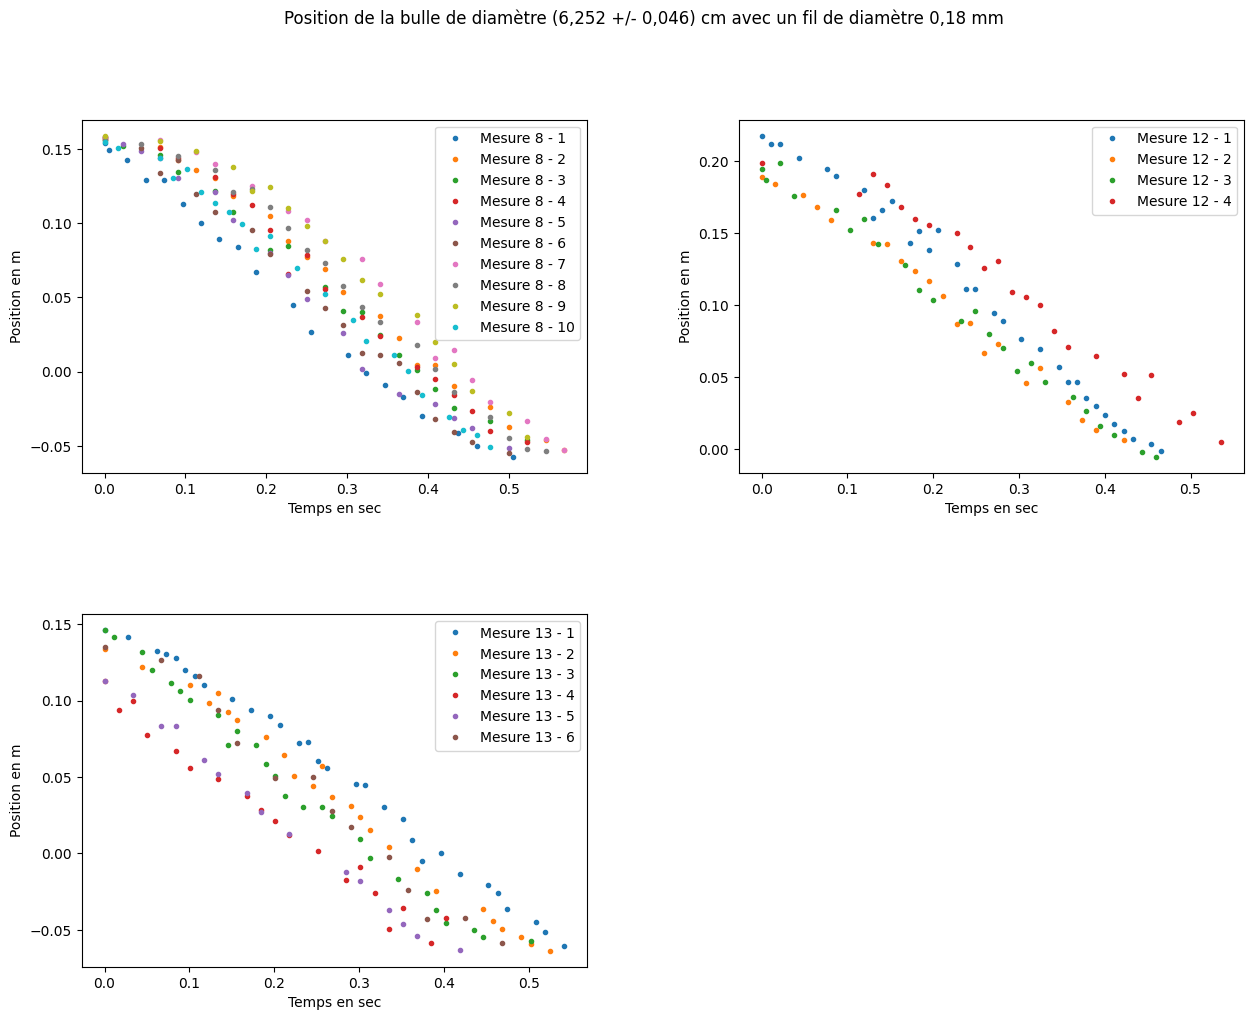

In [102]:
# Graphe pour bulle de diamètre (6,252 +/- 0,046) cm (8, 12, 13)
fig1, axe1 = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))

fig1.suptitle('Position de la bulle de diamètre (6,252 +/- 0,046) cm avec un fil de diamètre 0,18 mm')

# Graphe 8
axe1[0, 0].plot(tps81, pos81, '.', label='Mesure 8 - 1')
axe1[0, 0].plot(tps82, pos82, '.', label='Mesure 8 - 2')
axe1[0, 0].plot(tps83, pos83, '.', label='Mesure 8 - 3')
axe1[0, 0].plot(tps84, pos84, '.', label='Mesure 8 - 4')
axe1[0, 0].plot(tps85, pos85, '.', label='Mesure 8 - 5')
axe1[0, 0].plot(tps86, pos86, '.', label='Mesure 8 - 6')
axe1[0, 0].plot(tps87, pos87, '.', label='Mesure 8 - 7')
axe1[0, 0].plot(tps88, pos88, '.', label='Mesure 8 - 8')
axe1[0, 0].plot(tps89, pos89, '.', label='Mesure 8 - 9')
axe1[0, 0].plot(tps810, pos810, '.', label='Mesure 8 - 10')
axe1[0, 0].set_xlabel('Temps en sec')
axe1[0, 0].set_ylabel('Position en m')
axe1[0, 0].legend()

# Graphe 12
axe1[0, 1].plot(tps121, pos121, '.', label='Mesure 12 - 1')
axe1[0, 1].plot(tps122[:-1], pos122[:-1], '.', label='Mesure 12 - 2')
axe1[0, 1].plot(tps123, pos123, '.', label='Mesure 12 - 3')
axe1[0, 1].plot(tps124, pos124, '.', label='Mesure 12 - 4')
axe1[0, 1].set_xlabel('Temps en sec')
axe1[0, 1].set_ylabel('Position en m')
axe1[0, 1].legend()

# Graphe 13
axe1[1, 0].plot(tps131, pos131, '.', label='Mesure 13 - 1')
axe1[1, 0].plot(tps132, pos132, '.', label='Mesure 13 - 2')
axe1[1, 0].plot(tps133, pos133, '.', label='Mesure 13 - 3')
axe1[1, 0].plot(tps134, pos134, '.', label='Mesure 13 - 4')
axe1[1, 0].plot(tps135, pos135, '.', label='Mesure 13 - 5')
axe1[1, 0].plot(tps136, pos136, '.', label='Mesure 13 - 6')
axe1[1, 0].set_xlabel('Temps en sec')
axe1[1, 0].set_ylabel('Position en m')
axe1[1, 0].legend()

# Supprimer le graphe inutilisé
fig1.delaxes(axe1[1, 1])

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

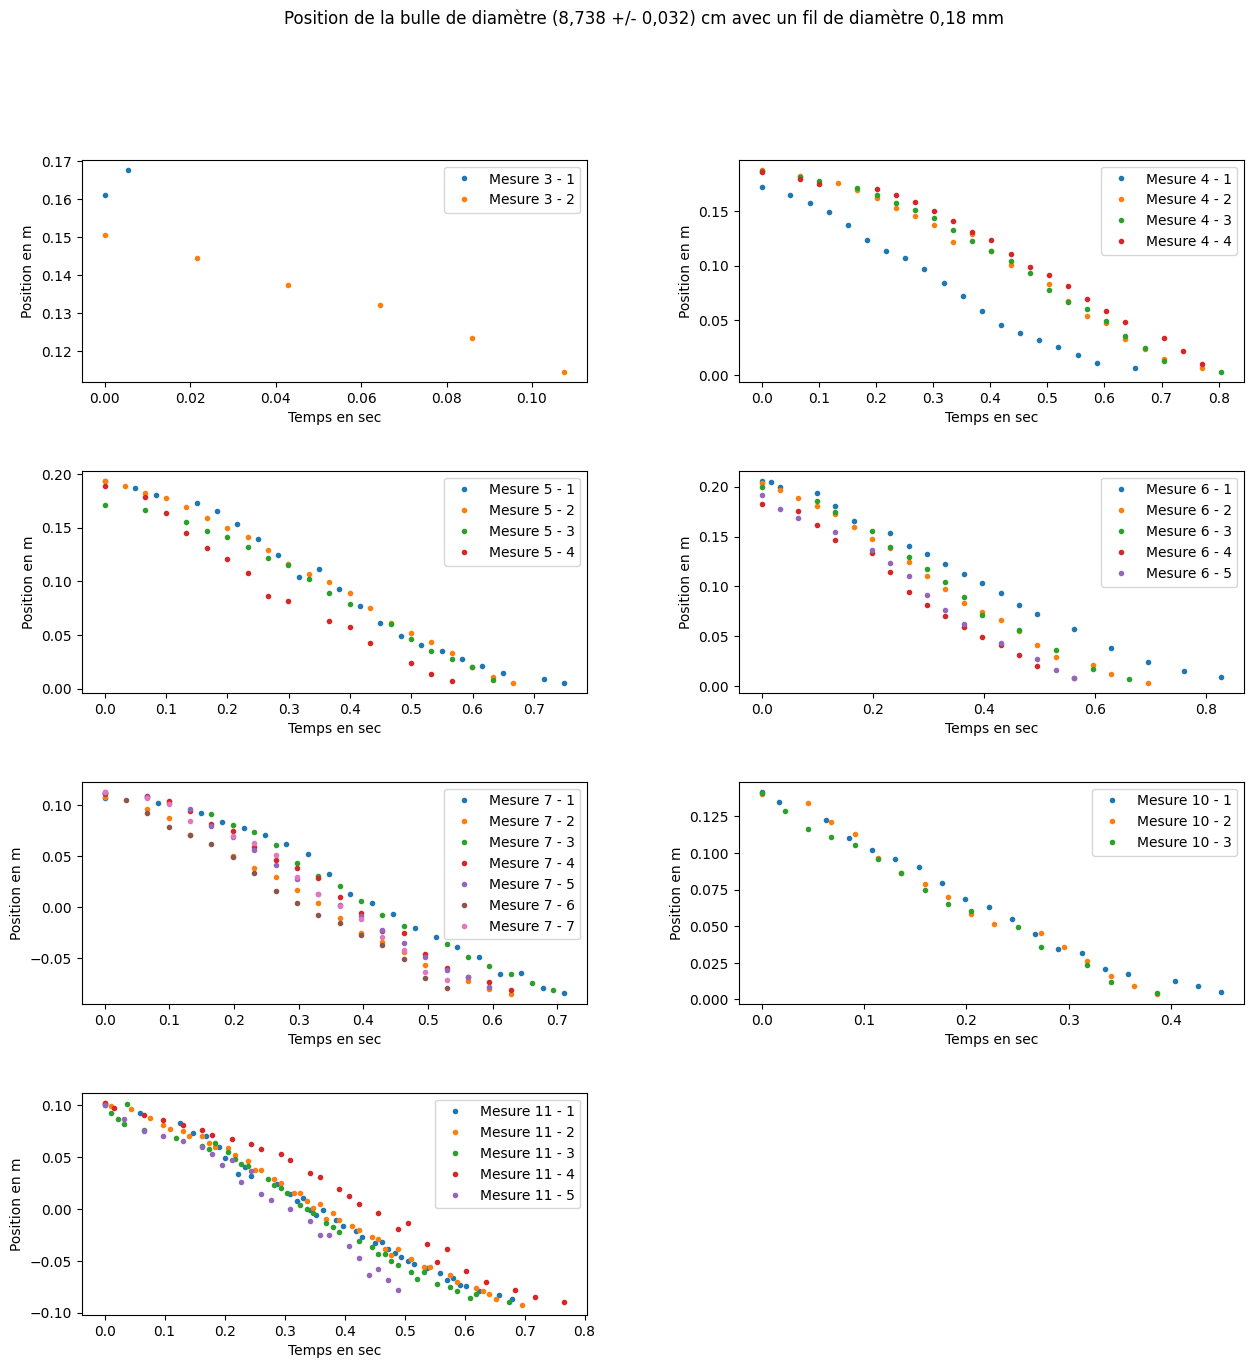

In [103]:
# Graphe pour bulle de diamètre (8,772 +/- 0,035) cm (3, 4, 5, 6, 7, 10, 11)
fig2, axe2 = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

fig2.suptitle('Position de la bulle de diamètre (8,738 +/- 0,032) cm avec un fil de diamètre 0,18 mm')

# Mesure 3
axe2[0, 0].plot(tps31, pos31, '.', label='Mesure 3 - 1')
axe2[0, 0].plot(tps32, pos32, '.', label='Mesure 3 - 2')

axe2[0, 0].set_xlabel('Temps en sec')
axe2[0, 0].set_ylabel('Position en m')
axe2[0, 0].legend()

# Mesure 4
axe2[0, 1].plot(tps41, pos41, '.', label='Mesure 4 - 1')
axe2[0, 1].plot(tps42, pos42, '.', label='Mesure 4 - 2')
axe2[0, 1].plot(tps43, pos43, '.', label='Mesure 4 - 3')
axe2[0, 1].plot(tps44, pos44, '.', label='Mesure 4 - 4')
axe2[0, 1].set_xlabel('Temps en sec')
axe2[0, 1].set_ylabel('Position en m')
axe2[0, 1].legend()

# Mesure 5
axe2[1, 0].plot(tps51, pos51, '.', label='Mesure 5 - 1')
axe2[1, 0].plot(tps52, pos52, '.', label='Mesure 5 - 2')
axe2[1, 0].plot(tps53, pos53, '.', label='Mesure 5 - 3')
axe2[1, 0].plot(tps54, pos54, '.', label='Mesure 5 - 4')
axe2[1, 0].set_xlabel('Temps en sec')
axe2[1, 0].set_ylabel('Position en m')
axe2[1, 0].legend()

# Mesure 6
axe2[1, 1].plot(tps61, pos61, '.', label='Mesure 6 - 1')
axe2[1, 1].plot(tps62, pos62, '.', label='Mesure 6 - 2')
axe2[1, 1].plot(tps63, pos63, '.', label='Mesure 6 - 3')
axe2[1, 1].plot(tps64, pos64, '.', label='Mesure 6 - 4')
axe2[1, 1].plot(tps65, pos65, '.', label='Mesure 6 - 5')
axe2[1, 1].set_xlabel('Temps en sec')
axe2[1, 1].set_ylabel('Position en m')
axe2[1, 1].legend()

# Mesure 7
axe2[2, 0].plot(tps71, pos71, '.', label='Mesure 7 - 1')
axe2[2, 0].plot(tps72, pos72, '.', label='Mesure 7 - 2')
axe2[2, 0].plot(tps73, pos73, '.', label='Mesure 7 - 3')
axe2[2, 0].plot(tps74, pos74, '.', label='Mesure 7 - 4')
axe2[2, 0].plot(tps75, pos75, '.', label='Mesure 7 - 5')
axe2[2, 0].plot(tps76, pos76, '.', label='Mesure 7 - 6')
axe2[2, 0].plot(tps77, pos77, '.', label='Mesure 7 - 7')
axe2[2, 0].set_xlabel('Temps en sec')
axe2[2, 0].set_ylabel('Position en m')
axe2[2, 0].legend()

# Mesure 10
axe2[2, 1].plot(tps101, pos101, '.', label='Mesure 10 - 1')
axe2[2, 1].plot(tps102, pos102, '.', label='Mesure 10 - 2')
axe2[2, 1].plot(tps103, pos103, '.', label='Mesure 10 - 3')
axe2[2, 1].set_xlabel('Temps en sec')
axe2[2, 1].set_ylabel('Position en m')
axe2[2, 1].legend()

# Mesure 11
axe2[3, 0].plot(tps111, pos111, '.', label='Mesure 11 - 1')
axe2[3, 0].plot(tps112, pos112, '.', label='Mesure 11 - 2')
axe2[3, 0].plot(tps113, pos113, '.', label='Mesure 11 - 3')
axe2[3, 0].plot(tps114, pos114, '.', label='Mesure 11 - 4')
axe2[3, 0].plot(tps115, pos115, '.', label='Mesure 11 - 5')
axe2[3, 0].set_xlabel('Temps en sec')
axe2[3, 0].set_ylabel('Position en m')
axe2[3, 0].legend()

# Suppression d'un graphe vide (dernier emplacement)
fig2.delaxes(axe2[3, 1])

# Ajustement des espaces entre les sous-graphiques
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

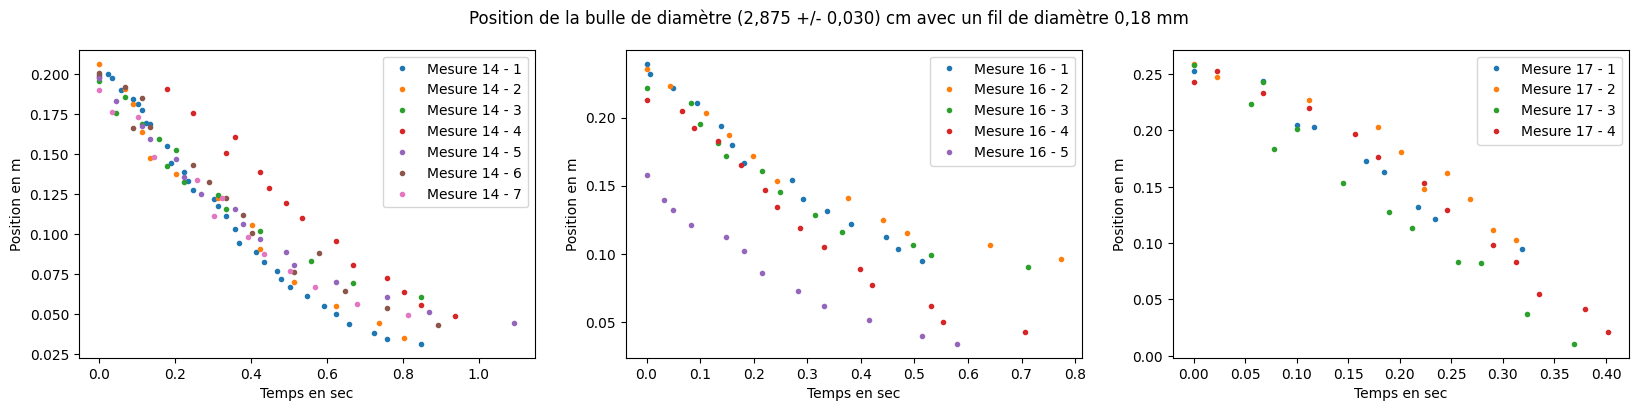

In [104]:
# Graphe bulle de diamètre (2,875 +/- 0,030) cm (14, 16, 17)
fig2, axe2 = plt.subplots(nrows=1,ncols=3, figsize=(20, 4))

fig2.suptitle('Position de la bulle de diamètre (2,875 +/- 0,030) cm avec un fil de diamètre 0,18 mm')

axe2[0].plot(tps141, pos141, '.', label='Mesure 14 - 1')
axe2[0].plot(tps142, pos142, '.', label='Mesure 14 - 2')
axe2[0].plot(tps143, pos143, '.', label='Mesure 14 - 3')
axe2[0].plot(tps144, pos144, '.', label='Mesure 14 - 4')
axe2[0].plot(tps145, pos145, '.', label='Mesure 14 - 5')
axe2[0].plot(tps146, pos146, '.', label='Mesure 14 - 6')
axe2[0].plot(tps147, pos147, '.', label='Mesure 14 - 7')
axe2[0].set_xlabel('Temps en sec')
axe2[0].set_ylabel('Position en m')
axe2[0].legend()

axe2[1].plot(tps161, pos161, '.', label='Mesure 16 - 1')
axe2[1].plot(tps162, pos162, '.', label='Mesure 16 - 2')
axe2[1].plot(tps163, pos163, '.', label='Mesure 16 - 3')
axe2[1].plot(tps164, pos164, '.', label='Mesure 16 - 4')
axe2[1].plot(tps165, pos165, '.', label='Mesure 16 - 5')
axe2[1].set_xlabel('Temps en sec')
axe2[1].set_ylabel('Position en m')
axe2[1].legend()

axe2[2].plot(tps171, pos171, '.', label='Mesure 17 - 1')
axe2[2].plot(tps172, pos172, '.', label='Mesure 17 - 2')
axe2[2].plot(tps173, pos173, '.', label='Mesure 17 - 3')
axe2[2].plot(tps174, pos174, '.', label='Mesure 17 - 4')
axe2[2].set_xlabel('Temps en sec')
axe2[2].set_ylabel('Position en m')
axe2[2].legend()

## Fil de Nylon de 0,10 mm

In [105]:
# Taille des bulles :

tail18 = 116*19.05/(478*100)
tail19 = 113*19.05/(469*100)
tail21 = 160*19.05/(486*100)
tail22 = 156*19.05/(472*100)
tail23 = 216*19.05/(615*100)
tail24 = 217*19.05/(622*100)
tail25 = 217*19.05/(616*100)
tail26 = 248*19.05/(616*100)
tail27 = 242*19.05/(620*100)
tail28 = 322*19.05/(618*100)
tail29 = 324*19.05/(624*100)
tail30 = 312*19.05/(619*100)
tail31 = 333*19.05/(640*100)
tail32 = 321*19.05/(623*100)
tail34 = 274*19.05/(415*100)
tail35 = 287*19.05/(424*100)

#print(tail18, tail19, tail21, tail22, tail23, tail24, tail25, tail26, tail27, tail28, tail29, tail30, tail31, tail32, tail34, tail35)

tab_4_moy = (tail18 + tail19)/2
u_tab_4 = np.abs(tail18 - tail19)/np.sqrt(12)
#print(tab_4_moy, u_tab_4)

tab_5_moy = (tail21 + tail22)/2
u_tab_5 = np.abs(tail21 - tail22)/np.sqrt(12)
#print(tab_5_moy, u_tab_5)

tab_6 = np.array([tail23, tail24, tail25])
tab_6_moy = np.mean(tab_6)
u_tab_6 = np.abs(tail23 - tail22)/np.sqrt(12)
print(tab_6_moy, u_tab_6)

tab_7_moy = (tail26 + tail27)/2
u_tab_7 = np.abs(tail27 - tail26)/np.sqrt(12)
#print(tab_7_moy, u_tab_7)

tab_8 = np.array([tail29, tail30, tail31, tail32])
tab_8_moy = np.mean(tab_8)
u_tab_8 = np.std(tab_8, ddof=1)/len(tab_8)
#print(tab_8_moy, u_tab_8)

tab_9_moy = (tail34 + tail35)/2
u_tab_9 = np.abs(tail34 - tail35)/np.sqrt(12)
#print(tab_9_moy, u_tab_9)

0.06682529418370038 0.0011389540795079054


In [106]:
# Echelles des posiitons et des temps

echpos18 = 28.85/(725*100)
echpos19 = 28.85/(719*100)
echpos21 = 28.85/(729*100)
echpos22 = 28.85/(716*100)
echpos23 = 28.85/(960*100)
echpos24 = 28.85/(940*100)
echpos25 = 28.85/(946*100)
echpos26 = 28.85/(940*100)
echpos27 = 28.85/(948*100)
echpos28 = 28.85/(984*100)
echpos29 = 28.85/(938*100)
echpos30 = 28.85/(930*100)
echpos31 = 28.85/(966*100)
echpos32 = 28.85/(950*100)
echpos34 = 28.85/(657*100)
echpos35 = 28.85/(663*100)

echtps18 = 30/886
echtps19 = 47/1405
echtps21 = 57/1181
echtps22 = 80/2415
echtps23 = 11/335
echtps24 = 68/2053
echtps25 = 73/2199
echtps26 = 91/2728
echtps27 = 101/3023
echtps28 = 23/683
echtps29 = 53/1574
echtps30 = 69/1983
echtps31 = 74/1774
echtps32 = 62/1866
echtps34 = 73/2200
echtps35 = 75/2243

In [107]:
# Code bulle 18 - 26

df18 = pd.read_csv('Mesure_bulle/ResultsBulle18.csv') 
array18 = df18.to_numpy()
tab18 = np.array(array18[:, 5:7])
tps18 = tab18[:, 0]*echtps18
pos18 = (tab18[:, 1]*echpos18 - tab_4_moy)

tab18 = sep(pos18, tps18, ecart_max=0.1)
pos181 = tab18[0][0]
pos182 = tab18[0][1]
pos183 = tab18[0][2]
pos184 = tab18[0][3]
tps181 = ini(tab18[1][0])
tps182 = ini(tab18[1][1])
tps183 = ini(tab18[1][2])
tps184 = ini(tab18[1][3])

df19 = pd.read_csv('Mesure_bulle/ResultsBulle19.csv') 
array19 = df19.to_numpy()
tab19 = np.array(array19[:, 5:7])
tps19 = tab19[:, 0]*echtps19
pos19 = (tab19[:, 1]*echpos19 - tab_4_moy)

tab19 = sep(pos19, tps19, ecart_max=0.1)
pos191 = tab19[0][0]
pos192 = tab19[0][1]
pos193 = tab19[0][2]
pos194 = tab19[0][3]
pos195 = tab19[0][4]
pos196 = tab19[0][5]
tps191 = ini(tab19[1][0])
tps192 = ini(tab19[1][1])
tps193 = ini(tab19[1][2])
tps194 = ini(tab19[1][3])
tps195 = ini(tab19[1][4])
tps196 = ini(tab19[1][5])

df21 = pd.read_csv('Mesure_bulle/ResultsBulle21.csv') 
array21 = df21.to_numpy()
tab21 = np.array(array21[:, 5:7])
tps21 = tab21[:, 0]*echtps21
pos21 = (tab21[:, 1]*echpos21 - tab_5_moy)

tab21 = sep(pos21, tps21, ecart_max=0.1)
pos211 = tab21[0][0]
pos212 = tab21[0][1]
pos213 = tab21[0][2]
tps211 = ini(tab21[1][0])
tps212 = ini(tab21[1][1])
tps213 = ini(tab21[1][2])

df22 = pd.read_csv('Mesure_bulle/ResultsBulle22.csv') 
array22 = df22.to_numpy()
tab22 = np.array(array22[:, 5:7])
tps22 = tab22[:, 0]*echtps22
pos22 = (tab22[:, 1]*echpos22 - tab_5_moy)

tab22 = sep(pos22, tps22, ecart_max=0.1)
pos221 = tab22[0][0]
pos222 = tab22[0][1]
pos223 = tab22[0][2]
pos224 = tab22[0][3]
pos225 = tab22[0][4]
pos226 = tab22[0][5]
pos227 = tab22[0][6]
tps221 = ini(tab22[1][0])
tps222 = ini(tab22[1][1])
tps223 = ini(tab22[1][2])
tps224 = ini(tab22[1][3])
tps225 = ini(tab22[1][4])
tps226 = ini(tab22[1][5])
tps227 = ini(tab22[1][6])


df23 = pd.read_csv('Mesure_bulle/ResultsBulle23.csv') 
array23 = df23.to_numpy()
tab23 = np.array(array23[:, 5:7])
tps23 = tab23[:, 0]*echtps23
pos23 = (tab23[:, 1]*echpos23 - tab_6_moy)

tab23 = sep(pos23, tps23, ecart_max=0.1)
pos231 = tab23[0][0]
tps231 = ini(tab23[1][0])

df24 = pd.read_csv('Mesure_bulle/ResultsBulle24.csv') 
array24 = df24.to_numpy()
tab24 = np.array(array24[:, 5:7])
tps24 = tab24[:, 0]*echtps24
pos24 = (tab24[:, 1]*echpos24 - tab_6_moy)

tab24 = sep(pos24, tps24, ecart_max=0.1)
pos241 = tab24[0][0]
pos242 = tab24[0][1]
pos243 = tab24[0][2]
pos244 = tab24[0][3]
pos245 = tab24[0][4]
pos246 = tab24[0][5]
pos247 = tab24[0][6]
pos248 = tab24[0][7]
pos249 = tab24[0][8]
pos2410 = tab24[0][9]
tps241 = ini(tab24[1][0])
tps242 = ini(tab24[1][1])
tps243 = ini(tab24[1][2])
tps244 = ini(tab24[1][3])
tps245 = ini(tab24[1][4])
tps246 = ini(tab24[1][5])
tps247 = ini(tab24[1][6])
tps248 = ini(tab24[1][7])
tps249 = ini(tab24[1][8])
tps2410 = ini(tab24[1][9])


df25 = pd.read_csv('Mesure_bulle/ResultsBulle25.csv') 
array25 = df25.to_numpy()
tab25 = np.array(array25[:, 5:7])
tps25 = tab25[:, 0]*echtps25
pos25 = (tab25[:, 1]*echpos25 - tab_6_moy)

tab25 = sep(pos25, tps25, ecart_max=0.1)
pos251 = tab25[0][0]
pos252 = tab25[0][1]
pos253 = tab25[0][2]
pos254 = tab25[0][3]
pos255 = tab25[0][4]
pos256 = tab25[0][5]
pos257 = tab25[0][6]
pos258 = tab25[0][7]
tps251 = ini(tab25[1][0])
tps252 = ini(tab25[1][1])
tps253 = ini(tab25[1][2])
tps254 = ini(tab25[1][3])
tps255 = ini(tab25[1][4])
tps256 = ini(tab25[1][5])
tps257 = ini(tab25[1][6])
tps258 = ini(tab25[1][7])

df26= pd.read_csv('Mesure_bulle/ResultsBulle26.csv') 
array26 = df26.to_numpy()
tab26 = np.array(array26[:, 5:7])
tps26 = tab26[:, 0]*echtps26
pos26 = (tab26[:, 1]*echpos26 - tab_7_moy)

tab26 = sep(pos26, tps26, ecart_max=0.1)
pos261 = tab26[0][0]
pos262 = tab26[0][1]
pos263 = tab26[0][2]
pos264 = tab26[0][3]
pos265 = tab26[0][4]
pos266 = tab26[0][5]
pos267 = tab26[0][6]
pos268 = tab26[0][7]
pos269 = tab26[0][8]
pos2610 = tab26[0][9]
pos2611 = tab26[0][10]
tps261 = ini(tab26[1][0])
tps262 = ini(tab26[1][1])
tps263 = ini(tab26[1][2])
tps264 = ini(tab26[1][3])
tps265 = ini(tab26[1][4])
tps266 = ini(tab26[1][5])
tps267 = ini(tab26[1][6])
tps268 = ini(tab26[1][7])
tps269 = ini(tab26[1][8])
tps2610 = ini(tab26[1][9])
tps2611 = ini(tab26[1][10])

In [108]:
# Code bulle 27 - 35

df27= pd.read_csv('Mesure_bulle/ResultsBulle27.csv') 
array27 = df27.to_numpy()
tab27 = np.array(array27[:, 5:7])
tps27 = tab27[:, 0]*echtps27
pos27 = (tab27[:, 1]*echpos27 - tab_7_moy)

tab27 = sep(pos27, tps27, ecart_max=0.1)
pos271 = tab27[0][0]
pos272 = tab27[0][1]
pos273 = tab27[0][2]
pos274 = tab27[0][3]
pos275 = tab27[0][4]
pos276 = tab27[0][5]
pos277 = tab27[0][6]
pos278 = tab27[0][7]
pos279 = tab27[0][8]
pos2710 = tab27[0][9]
pos2711 = tab27[0][10]
pos2712 = tab27[0][11]
tps271 = ini(tab27[1][0])
tps272 = ini(tab27[1][1])
tps273 = ini(tab27[1][2])
tps274 = ini(tab27[1][3])
tps275 = ini(tab27[1][4])
tps276 = ini(tab27[1][5])
tps277 = ini(tab27[1][6])
tps278 = ini(tab27[1][7])
tps279 = ini(tab27[1][8])
tps2710 = ini(tab27[1][9])
tps2711 = ini(tab27[1][10])
tps2712 = ini(tab27[1][11])

#df28= pd.read_csv('Mesure_bulle/ResultsBulle28.csv') 
#array28 = df28.to_numpy()
#tab28 = np.array(array28[:, 5:7])
#tps28 = tab28[:, 0]*echtps28
#pos28 = (tab28[:, 1]*echpos28 - tab_8_moy)

#tab28 = sep(pos28, tps28, ecart_max=0.1)
#pos281 = tab28[0][0]
#tps281 = ini(tab28[1][0])

df29= pd.read_csv('Mesure_bulle/ResultsBulle29.csv') 
array29 = df29.to_numpy()
tab29 = np.array(array29[:, 5:7])
tps29 = tab29[:, 0]*echtps29
pos29 = (938 - tab29[:, 1]*echpos29 - tab_8_moy)

tab29 = sep(pos29, tps29, ecart_max=0.1)
pos291 = tab29[0][0]
pos292 = tab29[0][1]
pos293 = tab29[0][2]
pos294 = tab29[0][3]
pos295 = tab29[0][4]
pos296 = tab29[0][5]
tps291 = ini(tab29[1][0])
tps292 = ini(tab29[1][1])
tps293 = ini(tab29[1][2])
tps294 = ini(tab29[1][3])
tps295 = ini(tab29[1][4])
tps296 = ini(tab29[1][5])


df30= pd.read_csv('Mesure_bulle/ResultsBulle30.csv') 
array30 = df30.to_numpy()
tab30 = np.array(array30[:, 5:7])
tps30 = tab30[:, 0]*echtps30
pos30 = (930 - tab30[:, 1]*echpos30 - tab_8_moy)

tab30 = sep(pos30, tps30, ecart_max=0.1)
pos301 = tab30[0][0]
pos302 = tab30[0][1]
pos303 = tab30[0][2]
pos304 = tab30[0][3]
pos305 = tab30[0][4]
pos306 = tab30[0][5]
tps301 = ini(tab30[1][0])
tps302 = ini(tab30[1][1])
tps303 = ini(tab30[1][2])
tps304 = ini(tab30[1][3])
tps305 = ini(tab30[1][4])
tps306 = ini(tab30[1][5])


df32 = pd.read_csv('Mesure_bulle/ResultsBulle32.csv') 
array32 = df32.to_numpy()
tab32 = np.array(array32[:, 5:7])
tps32 = tab32[:, 0]*echtps32
pos32 = (950 - tab32[:, 1]*echpos32 - tab_8_moy)

tab32 = sep(pos32, tps32, ecart_max=0.1)
pos321 = tab32[0][0]
pos322 = tab32[0][1]
pos323 = tab32[0][2]
pos324 = tab32[0][3]
pos325 = tab32[0][4]
pos326 = tab32[0][5]
tps321 = ini(tab32[1][0])
tps322 = ini(tab32[1][1])
tps323 = ini(tab32[1][2])
tps324 = ini(tab32[1][3])
tps325 = ini(tab32[1][4])
tps326 = ini(tab32[1][5])


df34= pd.read_csv('Mesure_bulle/ResultsBulle34.csv') 
array34 = df34.to_numpy()
tab34 = np.array(array34[:, 5:7])
tps34 = tab34[:, 0]*echtps34
pos34 = (tab34[:, 1]*echpos34 - tab_9_moy)

tab34 = sep(pos34, tps34, ecart_max=0.02)
pos341 = tab34[0][0]
pos342 = tab34[0][1]
pos343 = tab34[0][2]
pos344 = tab34[0][3]
pos345 = tab34[0][4]
pos346 = tab34[0][5]
pos347 = tab34[0][6]
pos348 = tab34[0][7]
pos349 = tab34[0][8]
pos3410 = tab34[0][9]
pos3411 = tab34[0][10]
pos3412 = tab34[0][11]
pos3413 = tab34[0][12]
tps341 = ini(tab34[1][0])
tps342 = ini(tab34[1][1])
tps343 = ini(tab34[1][2])
tps344 = ini(tab34[1][3])
tps345 = ini(tab34[1][4])
tps346 = ini(tab34[1][5])
tps347 = ini(tab34[1][6])
tps348 = ini(tab34[1][7])
tps349 = ini(tab34[1][8])
tps3410 = ini(tab34[1][9])
tps3411 = ini(tab34[1][10])
tps3412 = ini(tab34[1][11])
tps3413 = ini(tab34[1][12])


df35m= pd.read_csv('Mesure_bulle/ResultsBulle35M.csv') 
array35m = df35m.to_numpy()
tab35m = np.array(array35m[:, 5:7])
tps35m = tab35m[:, 0]*echtps35
pos35m = (tab35m[:, 1]*echpos35 - tab_9_moy)

tab35m = sep(pos35m, tps35m, ecart_max=0.1)
pos35m1 = tab35m[0][0]
pos35m2 = tab35m[0][1]
pos35m3 = tab35m[0][2]
tps35m1 = ini(tab35m[1][0])
tps35m2 = ini(tab35m[1][1])
tps35m3 = ini(tab35m[1][2])


df35d= pd.read_csv('Mesure_bulle/ResultsBulle35D.csv') 
array35d = df35d.to_numpy()
tab35d = array35d[:, 5:7]
tps35d = tab35d[:, 0]*echtps35
pos35d = tab35d[:, 1]*echpos35

tab35d = sep(pos35d, tps35d, ecart_max=0.1)
pos35d1 = tab35d[0][0]
pos35d2 = tab35d[0][1]
pos35d3 = tab35d[0][2]
pos35d4 = tab35d[0][3]
tps35d1 = ini(tab35d[1][0])
tps35d2 = ini(tab35d[1][1])
tps35d3 = ini(tab35d[1][2])
tps35d4 = ini(tab35d[1][3])

In [109]:
# Code bulle 33 -

#df33= pd.read_csv('Mesure_bulle/ResultsBulle33.csv') 
#array33 = df33.to_numpy()
#tab33 = array33[:, 5:7]
#tps33 = tab33[:, 0]*echtps33
#pos33 = (478-tab33[:, 1])*echpos33

#tab33 = sep(pos33, tps3, ecart_max=10)
#pos331 = tab33[0][0]
#tps331 = ini(tab33[1][0])

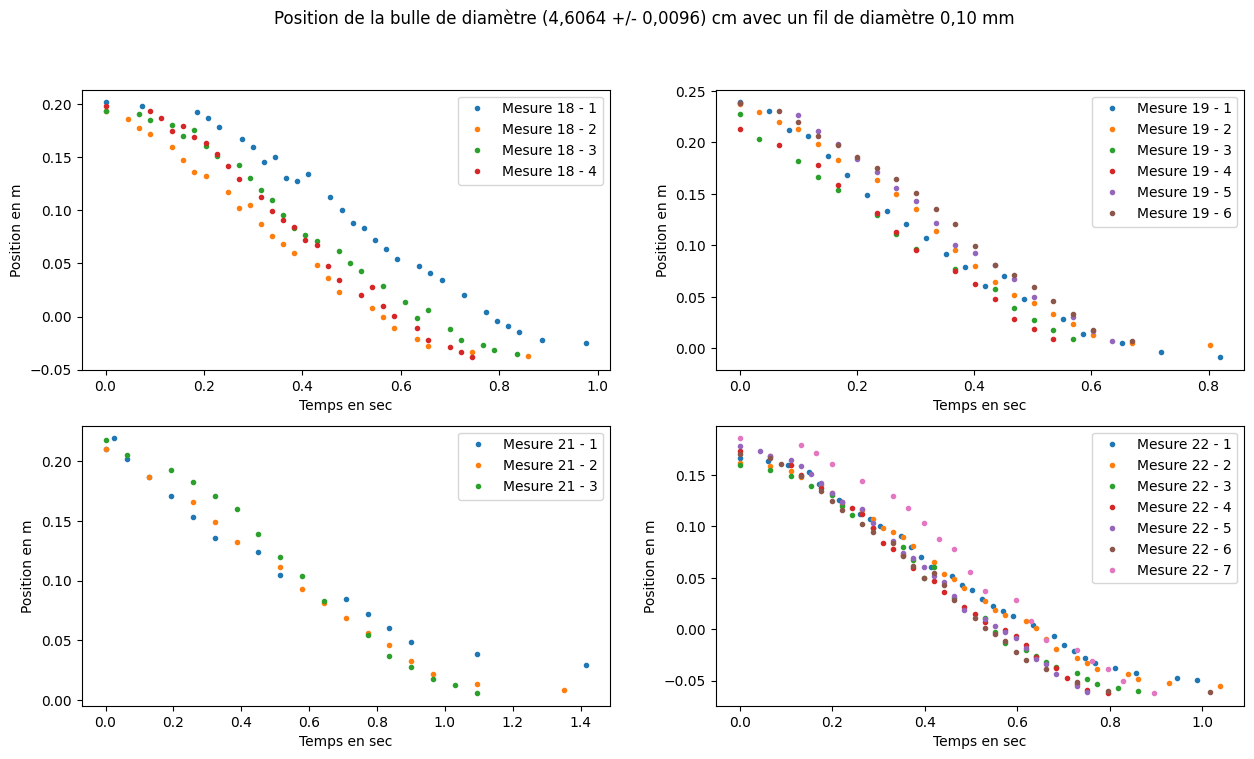

In [110]:
# Graphe bulle de diamètre (4,6064 +/- 0,0096) cm (18, 19, 20, 21)

fig3, axe3 = plt.subplots(nrows=2,ncols=2, figsize=(15, 8))

fig3.suptitle('Position de la bulle de diamètre (4,6064 +/- 0,0096) cm avec un fil de diamètre 0,10 mm')

axe3[0][0].plot(tps181, pos181, '.', label='Mesure 18 - 1')
axe3[0][0].plot(tps182, pos182, '.', label='Mesure 18 - 2')
axe3[0][0].plot(tps183, pos183, '.', label='Mesure 18 - 3')
axe3[0][0].plot(tps184, pos184, '.', label='Mesure 18 - 4')
axe3[0][0].set_xlabel('Temps en sec')
axe3[0][0].set_ylabel('Position en m')
axe3[0][0].legend()

axe3[0][1].plot(tps191, pos191, '.', label='Mesure 19 - 1')
axe3[0][1].plot(tps192, pos192, '.', label='Mesure 19 - 2')
axe3[0][1].plot(tps193, pos193, '.', label='Mesure 19 - 3')
axe3[0][1].plot(tps194, pos194, '.', label='Mesure 19 - 4')
axe3[0][1].plot(tps195, pos195, '.', label='Mesure 19 - 5')
axe3[0][1].plot(tps196, pos196, '.', label='Mesure 19 - 6')
axe3[0][1].set_xlabel('Temps en sec')
axe3[0][1].set_ylabel('Position en m')
axe3[0][1].legend()

axe3[1][0].plot(tps211, pos211, '.', label='Mesure 21 - 1')
axe3[1][0].plot(tps212, pos212, '.', label='Mesure 21 - 2')
axe3[1][0].plot(tps213, pos213, '.', label='Mesure 21 - 3')
axe3[1][0].set_xlabel('Temps en sec')
axe3[1][0].set_ylabel('Position en m')
axe3[1][0].legend()

axe3[1][1].plot(tps221, pos221, '.', label='Mesure 22 - 1')
axe3[1][1].plot(tps222, pos222, '.', label='Mesure 22 - 2')
axe3[1][1].plot(tps223, pos223, '.', label='Mesure 22 - 3')
axe3[1][1].plot(tps224, pos224, '.', label='Mesure 22 - 4')
axe3[1][1].plot(tps225, pos225, '.', label='Mesure 22 - 5')
axe3[1][1].plot(tps226, pos226, '.', label='Mesure 22 - 6')
axe3[1][1].plot(tps227, pos227, '.', label='Mesure 22 - 7')
axe3[1][1].set_xlabel('Temps en sec')
axe3[1][1].set_ylabel('Position en m')
axe3[1][1].legend()

plt.show()

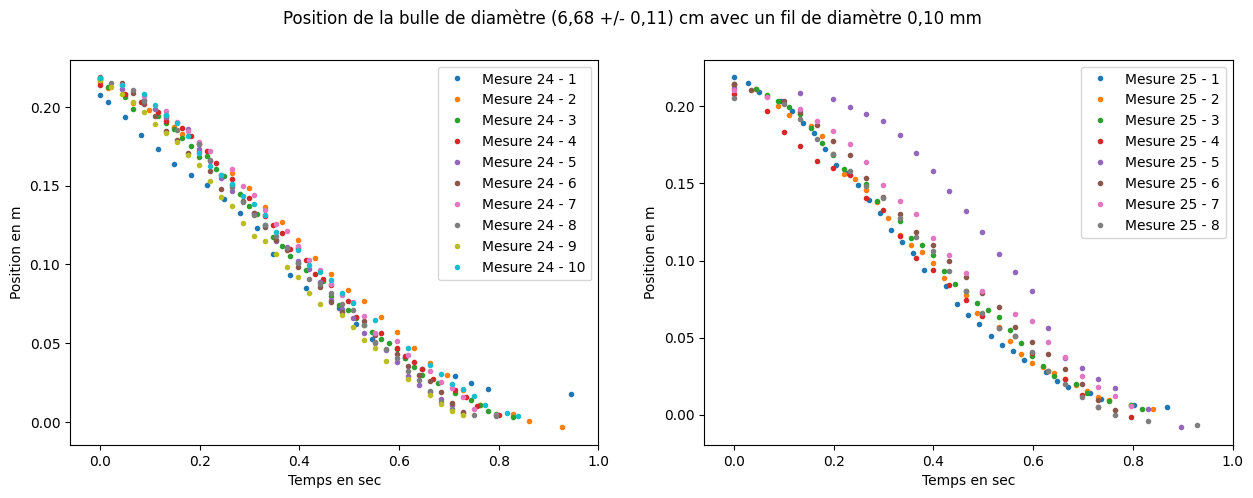

In [111]:
# Graphe bulle de diamètre (6,2839 +/- 0,0071) cm (24 - 25)

fig5, axe5 = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))

fig5.suptitle('Position de la bulle de diamètre (6,68 +/- 0,11) cm avec un fil de diamètre 0,10 mm')

axe5[0].plot(tps241, pos241, '.', label='Mesure 24 - 1')
axe5[0].plot(tps242, pos242, '.', label='Mesure 24 - 2')
axe5[0].plot(tps243, pos243, '.', label='Mesure 24 - 3')
axe5[0].plot(tps244, pos244, '.', label='Mesure 24 - 4')
axe5[0].plot(tps245, pos245, '.', label='Mesure 24 - 5')
axe5[0].plot(tps246, pos246, '.', label='Mesure 24 - 6')
axe5[0].plot(tps247, pos247, '.', label='Mesure 24 - 7')
axe5[0].plot(tps248, pos248, '.', label='Mesure 24 - 8')
axe5[0].plot(tps249, pos249, '.', label='Mesure 24 - 9')
axe5[0].plot(tps2410, pos2410, '.', label='Mesure 24 - 10')
axe5[0].set_xlim(-0.06, 1)
axe5[0].set_xlabel('Temps en sec')
axe5[0].set_ylabel('Position en m')
axe5[0].legend()

axe5[1].plot(tps251, pos251, '.', label='Mesure 25 - 1')
axe5[1].plot(tps252, pos252, '.', label='Mesure 25 - 2')
axe5[1].plot(tps253, pos253, '.', label='Mesure 25 - 3')
axe5[1].plot(tps254, pos254, '.', label='Mesure 25 - 4')
axe5[1].plot(tps255, pos255, '.', label='Mesure 25 - 5')
axe5[1].plot(tps256, pos256, '.', label='Mesure 25 - 6')
axe5[1].plot(tps257, pos257, '.', label='Mesure 25 - 7')
axe5[1].plot(tps258, pos258, '.', label='Mesure 25 - 8')
axe5[1].set_xlim(-0.06, 1)
axe5[1].set_xlabel('Temps en sec')
axe5[1].set_ylabel('Position en m')
axe5[1].legend()

plt.show()

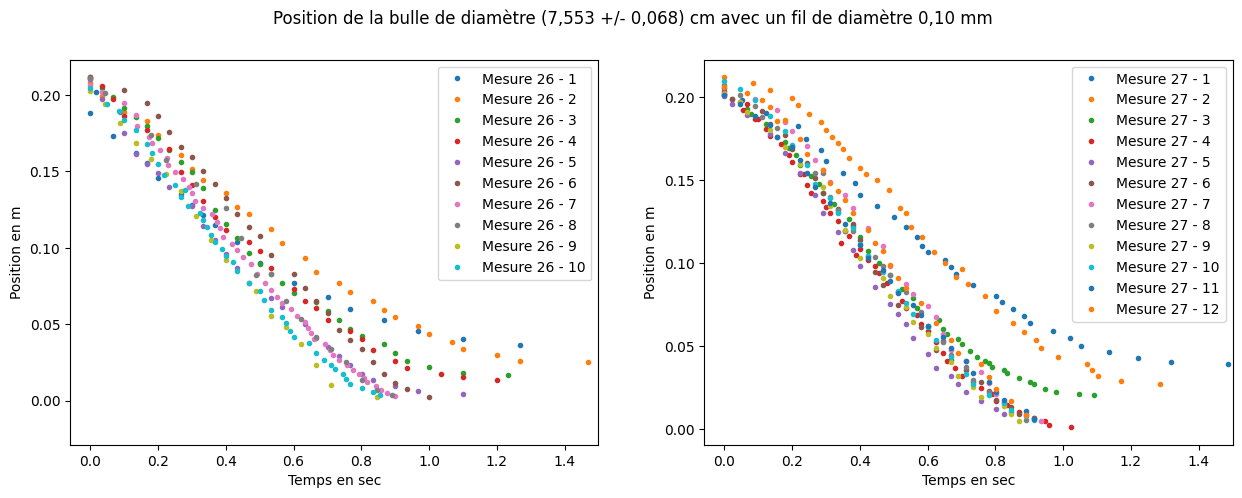

In [112]:
# Graphe bulle de diamètre (6,68 +/- 0,11) (26 - 27)

fig6, axe6 = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))

fig6.suptitle('Position de la bulle de diamètre (7,553 +/- 0,068) cm avec un fil de diamètre 0,10 mm')

axe6[0].plot(tps261, pos261, '.', label='Mesure 26 - 1')
axe6[0].plot(tps262, pos262, '.', label='Mesure 26 - 2')
axe6[0].plot(tps263, pos263, '.', label='Mesure 26 - 3')
axe6[0].plot(tps264, pos264, '.', label='Mesure 26 - 4')
axe6[0].plot(tps265, pos265, '.', label='Mesure 26 - 5')
axe6[0].plot(tps266, pos266, '.', label='Mesure 26 - 6')
axe6[0].plot(tps267, pos267, '.', label='Mesure 26 - 7')
axe6[0].plot(tps268, pos268, '.', label='Mesure 26 - 8')
axe6[0].plot(tps269, pos269, '.', label='Mesure 26 - 9')
axe6[0].plot(tps2610, pos2610, '.', label='Mesure 26 - 10')
axe6[0].set_xlim(-0.06, 1.5)
axe6[0].set_xlabel('Temps en sec')
axe6[0].set_ylabel('Position en m')
axe6[0].legend()

axe6[1].plot(tps271, pos271, '.', label='Mesure 27 - 1')
axe6[1].plot(tps272, pos272, '.', label='Mesure 27 - 2')
axe6[1].plot(tps273, pos273, '.', label='Mesure 27 - 3')
axe6[1].plot(tps274, pos274, '.', label='Mesure 27 - 4')
axe6[1].plot(tps275, pos275, '.', label='Mesure 27 - 5')
axe6[1].plot(tps276, pos276, '.', label='Mesure 27 - 6')
axe6[1].plot(tps277, pos277, '.', label='Mesure 27 - 7')
axe6[1].plot(tps278, pos278, '.', label='Mesure 27 - 8')
axe6[1].plot(tps279, pos279, '.', label='Mesure 27 - 9')
axe6[1].plot(tps2710, pos2710, '.', label='Mesure 27 - 10')
axe6[1].plot(tps2711, pos2711, '.', label='Mesure 27 - 11')
axe6[1].plot(tps2712, pos2712, '.', label='Mesure 27 - 12')
axe6[1].set_xlim(-0.06, 1.5)
axe6[1].set_xlabel('Temps en sec')
axe6[1].set_ylabel('Position en m')
axe6[1].legend()


plt.show()

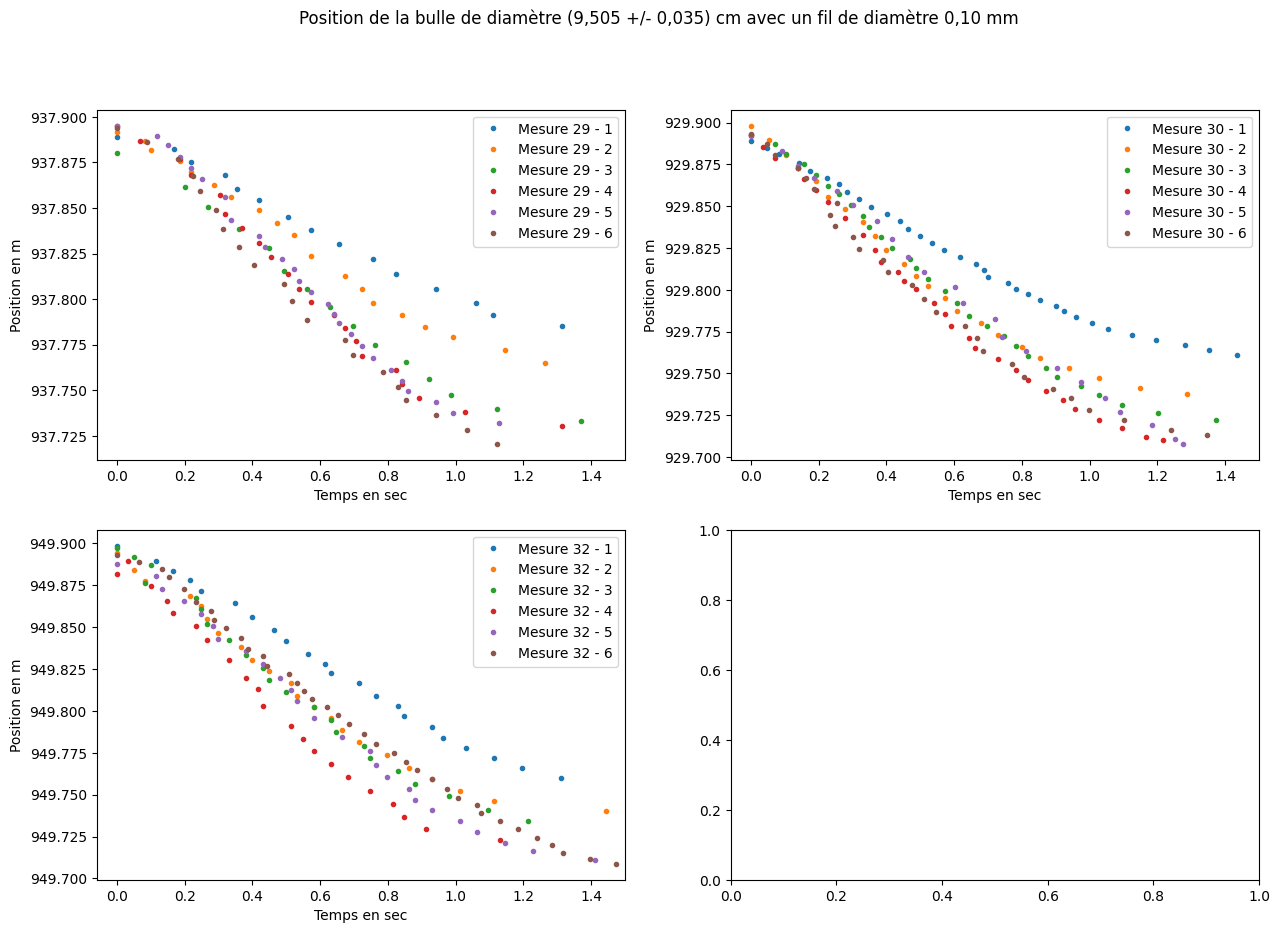

In [113]:
# Graphe bulle de diamètre (9,805 +/- 0,035) cm (28 - 29 - 30 - 32)

fig7, axe7 = plt.subplots(nrows=2,ncols=2, figsize=(15, 10))

fig7.suptitle('Position de la bulle de diamètre (9,505 +/- 0,035) cm avec un fil de diamètre 0,10 mm')


axe7[0, 0].plot(tps291, pos291, '.', label='Mesure 29 - 1')
axe7[0, 0].plot(tps292, pos292, '.', label='Mesure 29 - 2')
axe7[0, 0].plot(tps293, pos293, '.', label='Mesure 29 - 3')
axe7[0, 0].plot(tps294, pos294, '.', label='Mesure 29 - 4')
axe7[0, 0].plot(tps295, pos295, '.', label='Mesure 29 - 5')
axe7[0, 0].plot(tps296, pos296, '.', label='Mesure 29 - 6')
axe7[0, 0].set_xlim(-0.06, 1.5)
axe7[0, 0].set_xlabel('Temps en sec')
axe7[0, 0].set_ylabel('Position en m')
axe7[0, 0].legend()

axe7[0, 1].plot(tps301, pos301, '.', label='Mesure 30 - 1')
axe7[0, 1].plot(tps302, pos302, '.', label='Mesure 30 - 2')
axe7[0, 1].plot(tps303, pos303, '.', label='Mesure 30 - 3')
axe7[0, 1].plot(tps304, pos304, '.', label='Mesure 30 - 4')
axe7[0, 1].plot(tps305, pos305, '.', label='Mesure 30 - 5')
axe7[0, 1].plot(tps306, pos306, '.', label='Mesure 30 - 6')
axe7[0, 1].set_xlim(-0.06, 1.5)
axe7[0, 1].set_xlabel('Temps en sec')
axe7[0, 1].set_ylabel('Position en m')
axe7[0, 1].legend()

axe7[1, 0].plot(tps321, pos321, '.', label='Mesure 32 - 1')
axe7[1, 0].plot(tps322, pos322, '.', label='Mesure 32 - 2')
axe7[1, 0].plot(tps323, pos323, '.', label='Mesure 32 - 3')
axe7[1, 0].plot(tps324, pos324, '.', label='Mesure 32 - 4')
axe7[1, 0].plot(tps325, pos325, '.', label='Mesure 32 - 5')
axe7[1, 0].plot(tps326, pos326, '.', label='Mesure 32 - 6')
axe7[1, 0].set_xlim(-0.06, 1.5)
axe7[1, 0].set_xlabel('Temps en sec')
axe7[1, 0].set_ylabel('Position en m')
axe7[1, 0].legend()
plt.show()

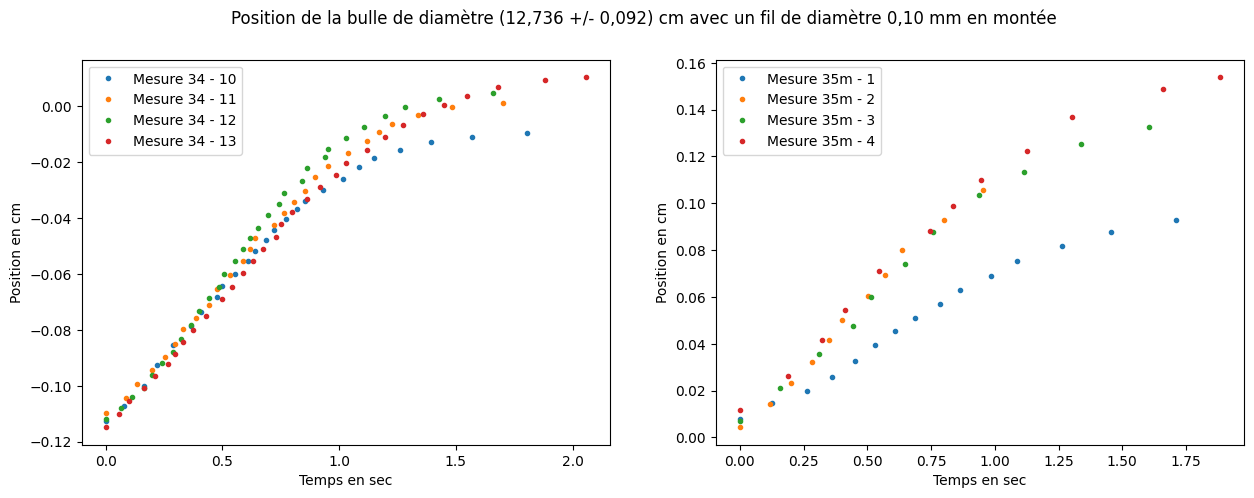

In [114]:
# Graphe bulle de diamètre (12,736 +/- 0,092), montée (34 - 35)
fig8, axe8 = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))

fig8.suptitle('Position de la bulle de diamètre (12,736 +/- 0,092) cm avec un fil de diamètre 0,10 mm en montée')


axe8[0].plot(tps3410, pos3410, '.', label='Mesure 34 - 10')
axe8[0].plot(tps3411, pos3411, '.', label='Mesure 34 - 11')
axe8[0].plot(tps3412, pos3412, '.', label='Mesure 34 - 12')
axe8[0].plot(tps3413, pos3413, '.', label='Mesure 34 - 13')
#axe8[0].set_xlim(-0.06, 0.5)
axe8[0].set_xlabel('Temps en sec')
axe8[0].set_ylabel('Position en cm')
axe8[0].legend()

axe8[1].plot(tps35d1[:15], pos35d1[:15], '.', label='Mesure 35m - 1')
axe8[1].plot(tps35d2[:11], pos35d2[:11], '.', label='Mesure 35m - 2')
axe8[1].plot(tps35d3, pos35d3, '.', label='Mesure 35m - 3')
axe8[1].plot(tps35d4, pos35d4, '.', label='Mesure 35m - 4')
#axe8[1].set_xlim(-0.06, 0.5)
axe8[1].set_xlabel('Temps en sec')
axe8[1].set_ylabel('Position en cm')
axe8[1].legend()


plt.show()

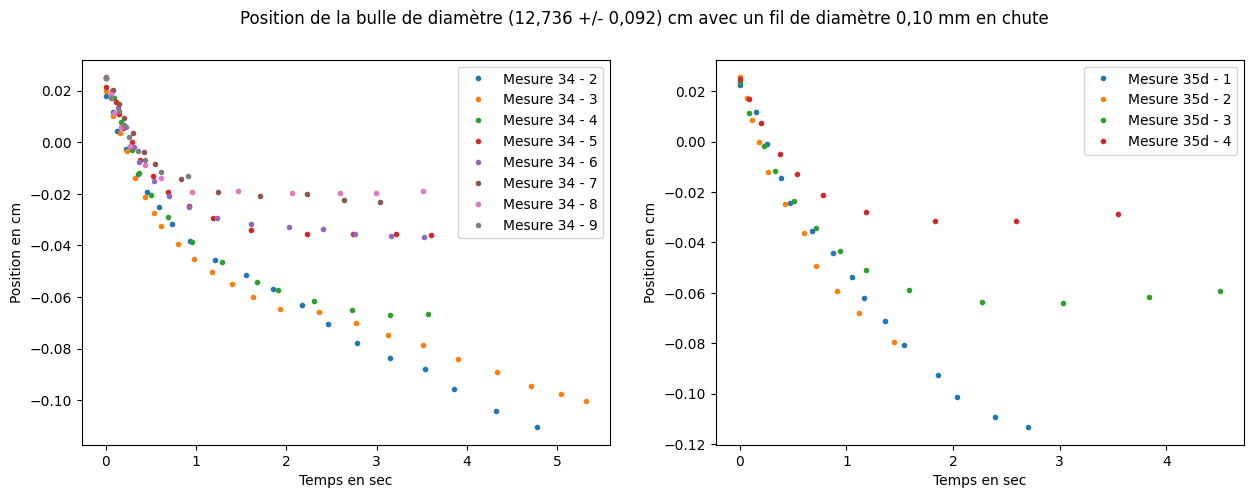

In [115]:
# Graphe bulle de diamètre (12,736 +/- 0,092), en chute(34 - 35)
fig9, axe9 = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))

fig9.suptitle('Position de la bulle de diamètre (12,736 +/- 0,092) cm avec un fil de diamètre 0,10 mm en chute')

axe9[0].plot(tps342, pos342, '.', label='Mesure 34 - 2')
axe9[0].plot(tps343, pos343, '.', label='Mesure 34 - 3')
axe9[0].plot(tps344, pos344, '.', label='Mesure 34 - 4')
axe9[0].plot(tps345, pos345, '.', label='Mesure 34 - 5')
axe9[0].plot(tps346, pos346, '.', label='Mesure 34 - 6')
axe9[0].plot(tps347, pos347, '.', label='Mesure 34 - 7')
axe9[0].plot(tps348, pos348, '.', label='Mesure 34 - 8')
axe9[0].plot(tps349, pos349, '.', label='Mesure 34 - 9')
axe9[0].set_xlabel('Temps en sec')
axe9[0].set_ylabel('Position en cm')
axe9[0].legend()

axe9[1].plot(tps35m1[:15], pos35m1[:15], '.', label='Mesure 35d - 1')
axe9[1].plot(tps35m2[:11], pos35m2[:11], '.', label='Mesure 35d - 2')
axe9[1].plot(tps35m3[:-10], pos35m3[:-10], '.', label='Mesure 35d - 3')
axe9[1].plot(ini(tps35m3[-10:]), pos35m3[-10:], '.', label='Mesure 35d - 4')
axe9[1].set_xlabel('Temps en sec')
axe9[1].set_ylabel('Position en cm')
axe9[1].legend()

plt.show()

In [116]:
# Fonctions vitesses

## fonction vitesse experimentale
def vit_exp(tab_tps, tab_pos):
    tab_vit = []
    tab_tps2 = []
    for i in range(len(tab_tps)-2):
        tab_vit.append((tab_pos[i+1] - tab_pos[i])/(tab_tps[i+1] - tab_tps[i]))
        tab_tps2.append((tab_tps[i+1] + tab_tps[i])/2)
    
    return tab_tps2, tab_vit

## fonction pour l'ajustement
def fe(x, a, b):
    return a*np.exp(-x/b)

## fonction calcul de la viscosité
def heta(p_glycerol,p_savon):
    heta_eau=1/1000
    heta_savon=400/1000
    heta_glycerol=1.49
    heta_solution = (heta_savon ** p_savon) * (heta_glycerol ** p_glycerol) * heta_eau ** (1-p_savon-p_glycerol)
    return heta_solution

## fonction vitesse théorique avec intervalle de temps regulier
def vit_theo1(d_bulle, d_fil, dt, tab_x_exp, t_pos, t_ep):
    g = 9.81
    rho_air = 1204
    rho_fil = 1130
    r_bulle = d_bulle/2
    m = ((np.pi * ((d_fil/2)**2) ) * (d_bulle * np.pi) * rho_fil)
    res, _ = opt.curve_fit(fe, t_pos, t_ep)
    a, b = res
    
    tab_a = []
    tab_v = [0]
    tab_x = [tab_x_exp[0]]
    tab_tps = [0]
    P = - m * g 

    while tab_x[-1] > tab_x_exp[-1] :
        tab_a.append((P + a*np.exp(-tab_x[-1]/b)*rho_air*g*np.pi*(r_bulle**2))/m)
        tab_v.append(tab_v[-1] + (tab_a[-1])*dt)
        tab_x.append(tab_x[-1] + tab_v[-1]*dt)
        tab_tps.append( tab_tps[-1] + dt)
    
    else :
        return tab_tps, tab_x, tab_v, tab_a
    
## fonction vitesse théorique avec intervalle de temps ajusté sur le temps experimental
def vit_theo2(d_bulle, d_fil, tab_x_exp, tab_tps_exp, t_pos, t_ep):
    g = 9.81
    rho_air = 1204
    rho_fil = 1130
    r_bulle = d_bulle/2
    m = ((np.pi * ((d_fil/2)**2) ) * (d_bulle * np.pi) * rho_fil)
    res, _ = opt.curve_fit(fe, t_pos, t_ep)
    a, b = res

    tab_int_tps = [0]
    for i in range(len(tab_tps_exp)-2):
        tab_int_tps.append(tab_tps_exp[i+1]-tab_tps_exp[i])

    tab_a = []
    tab_v = [0]
    tab_x = [tab_x_exp[0]]
    tab_t = [0]
    P = - m * g 

    i = 0

    while ((i < 3) or(tab_x[-2] > tab_x[-1])):
        tab_a.append((P + a*np.exp(-tab_x[-1]/b)*rho_air*g*np.pi*(r_bulle**2))/m)
        tab_v.append(tab_v[-1] + (tab_a[-1])*tab_int_tps[i])
        tab_x.append(tab_x[-1] + tab_v[-1]*tab_int_tps[i])
        tab_t.append(tab_t[-1]+ tab_int_tps[i])
        i = i+1
    
    tab_x_exp2 = tab_x_exp[:len(tab_x)]

    diff_x = np.array(tab_x_exp2) - np.array(tab_x)
   
    return np.array(tab_t)[:-1], np.array(tab_x)[:-1], np.array(tab_v)[:-1], np.array(tab_a)[:-1], np.array(tab_x_exp2)[:-1], np.array(diff_x)[:-1]



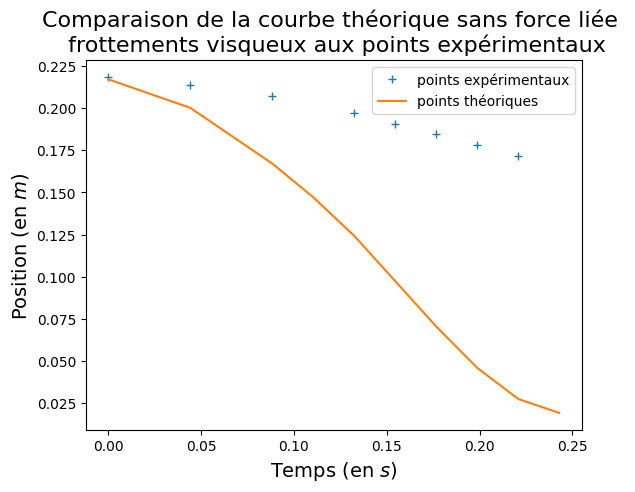

In [117]:
# Calcul frottement

##profil d'épaisseur du film
t_ha241max = np.array([965, 918, 537, 370, 298, 278, 263, 245, 223, 201])*echpos24
t_ha241min = np.array([918, 823, 403, 318, 278, 263, 247, 223, 201, 175])*echpos24

t_ep241min = np.array([86, 129, 228, 320, 388, 428, 544, 629, 693, 798])/1000000000
t_ep241max = np.array([101, 150, 241, 329, 393, 444, 553, 645, 730, 820])/1000000000

t_ep241 = (t_ep241max + t_ep241min)/2 
t_ha241 = (t_ha241max + t_ha241min)/2 

resu = vit_theo2(0.07, 0.0001, pos245, tps245, t_ha241, t_ep241)

plt.figure()
plt.plot(tps247[0:8], pos247[0:8], '+', label='points expérimentaux')
plt.plot(resu[0], resu[1], label='points théoriques')
plt.xlabel(r'Temps (en $s$)', fontsize=14)
plt.ylabel(r'Position (en $m$)', fontsize=14)
plt.title('Comparaison de la courbe théorique sans force liée \n frottements visqueux aux points expérimentaux', fontsize=16)
plt.legend()
plt.savefig('fig_frot')
plt.show()

In [118]:
# Fonction vitesse limite

def v_lim(tab_tps,tab_pos,tmin,tmax):
    tab_tps2 = []
    tab_pos2 = []
    
    for i in range (len(tab_tps)-1) :
        if ((tab_tps[i] > tmin) and (tab_tps[i] < tmax)):
            tab_tps2.append(tab_tps[i])
            tab_pos2.append(tab_pos[i])
    res = fu.linfitxy(tab_tps2,tab_pos2, intercept = True, plot = False)
    vit_lim = res[0]
    u_vit_lim = res[2]
    
    return tab_tps2,tab_pos2,vit_lim,u_vit_lim

In [119]:
# Pour les bulles de diamètre (6,252 +/- 0,046) cm (8,12,13)
v_lim_r1 = []

#Vidéo 8 :
v_lim_81 = v_lim(tps81,pos81,0,0.51)[2]
v_lim_r1.append(v_lim_81)
v_lim_82 = v_lim(tps82,pos82,0,tps82[len(tps82)-1])[2]
v_lim_r1.append(v_lim_82)
v_lim_83 = v_lim(tps83,pos83,0.1,0.48)[2]
v_lim_r1.append(v_lim_83)
v_lim_84 = v_lim(tps84,pos84,0.15,0.48)[2]
v_lim_r1.append(v_lim_84)
v_lim_85 = v_lim(tps85,pos85,0.15,0.45)[2]
v_lim_r1.append(v_lim_85)
v_lim_86 = v_lim(tps86,pos86,0,0.4)[2]
v_lim_r1.append(v_lim_86)
v_lim_87 = v_lim(tps87,pos87,0.15,0.45)[2]
v_lim_r1.append(v_lim_87)
v_lim_88 = v_lim(tps88,pos88,0.2,0.5)[2]
v_lim_r1.append(v_lim_88)
v_lim_89 = v_lim(tps89,pos89,0.2,0.5)[2]
v_lim_r1.append(v_lim_89)
v_lim_810 = v_lim(tps810,pos810,0.1,0.4)[2]
v_lim_r1.append(v_lim_810)
v_lim8 = np.array([v_lim_81,v_lim_82,v_lim_83,v_lim_84,v_lim_85,v_lim_86,v_lim_87,v_lim_88,v_lim_89,v_lim_810])
v_lim8_moyen = np.mean(v_lim8)
u_v_lim8 = np.std(v_lim8, ddof =1) / np.sqrt(len(v_lim8))

#Vidéo 12 :
v_lim_121 = v_lim(tps121,pos121,0.2,0.7)[2]
v_lim_r1.append(v_lim_121)
v_lim_122 = v_lim(tps122[:-1],pos122[:-1],0.2,0.52)[2]
v_lim_r1.append(v_lim_122)
v_lim_123 = v_lim(tps123,pos123,0.1,0.6)[2]
v_lim_r1.append(v_lim_123)
v_lim_124 = v_lim(tps124,pos124,0.2,0.6)[2]
v_lim_r1.append(v_lim_124)
v_lim12 = np.array([v_lim_121,v_lim_122,v_lim_123,v_lim_124])
v_lim12_moyen = np.mean(v_lim12)
u_v_lim12 = np.std(v_lim12, ddof =1) / np.sqrt(len(v_lim12))

print("La vitesse limite moyenne pour la vidéo 8 est (", v_lim8_moyen, "+/-", u_v_lim8,") m/s")
print("La vitesse limite moyenne pour la vidéo 12 est (", v_lim12_moyen, "+/-", u_v_lim12,") m/s")

La vitesse limite moyenne pour la vidéo 8 est ( -0.4862129575990581 +/- 0.007587709244959619 ) m/s
La vitesse limite moyenne pour la vidéo 12 est ( -0.4979170667595077 +/- 0.025596977618000567 ) m/s


In [120]:
v_lim_r1_moyen = np.mean(v_lim_r1)
u_v_lim_r1 = np.std(v_lim_r1 , ddof =1) / np.sqrt(len(v_lim_r1))
print("La vitesse limite moyenne pour une bulle de diamètre (6,315 +/- 0,030) cm est (", v_lim_r1_moyen, "+/-",u_v_lim_r1,") m/s")

La vitesse limite moyenne pour une bulle de diamètre (6,315 +/- 0,030) cm est ( -0.48955698878775805 +/- 0.008591924416178846 ) m/s


In [121]:
#for i in v_lim_r1 : 
   # plt.plot(np.arange(0,5),np.ones(5)*i)

#plt.plot(np.arange(0,5),np.ones(5)*v_lim_r1_moyen, label="Valeur vitesse limite moyenne")
#plt.legend()
#plt.show()

In [122]:
# Pour les bulles de diamètre (8,738 +/- 0,013) cm (3, 4, 5, 6, 7, 10, 11)
v_lim_r2 = []
#v_lim3 = []
v_lim4 = []
v_lim5 = []
v_lim6 = []
v_lim7 = []
v_lim10 = []
v_lim11 = []

#Vidéo 3 :
#v_lim_32 = v_lim(tps32,pos32,0.11)[2]
#v_lim_r2.append(v_lim_32)
#v_lim3 = v_lim_32

#Vidéo 4 :
v_lim_41 = v_lim(tps41,pos41,0.18,0.4)[2]
v_lim_r2.append(v_lim_41)
v_lim4.append(v_lim_41)
v_lim_42 = v_lim(tps42,pos42,0.2,0.6)[2]
v_lim_r2.append(v_lim_42)
v_lim4.append(v_lim_42)
v_lim_43 = v_lim(tps43,pos43,0.3,0.6)[2]
v_lim_r2.append(v_lim_43)
v_lim4.append(v_lim_43)
v_lim_44 = v_lim(tps44,pos44,0.3,0.6)[2]
v_lim_r2.append(v_lim_44)
v_lim4.append(v_lim_44)
v_lim4_moyen = np.mean(v_lim4)
u_v_lim4 = np.std(v_lim4, ddof =1) / np.sqrt(len(v_lim4))
print("La vitesse limite moyenne pour la vidéo 4 est (", v_lim4_moyen, "+/-", u_v_lim4,") m/s")

#Vidéo 5 :
v_lim_51 = v_lim(tps51,pos51,0.22,0.37)[2]
v_lim_r2.append(v_lim_51)
v_lim5.append(v_lim_51)
v_lim_52 = v_lim(tps52,pos52,0.22,0.45)[2]
v_lim_r2.append(v_lim_52)
v_lim5.append(v_lim_52)
v_lim_53 = v_lim(tps53,pos53,0.17,0.4)[2]
v_lim_r2.append(v_lim_53)
v_lim5.append(v_lim_53)
v_lim_54 = v_lim(tps54,pos54,0.23,0.4)[2]
v_lim_r2.append(v_lim_54)
v_lim5.append(v_lim_54)
v_lim5_moyen = np.mean(v_lim5)
u_v_lim5 = np.std(v_lim5, ddof =1) / np.sqrt(len(v_lim5))
print("La vitesse limite moyenne pour la vidéo 5 est (", v_lim5_moyen, "+/-", u_v_lim5,") m/s")

#Vidéo 6 :
v_lim_61 = v_lim(tps61,pos61,0.2,0.55)[2]
v_lim_r2.append(v_lim_61)
v_lim6.append(v_lim_61)
v_lim_62 = v_lim(tps62,pos62,0.23,0.6)[2]
v_lim_r2.append(v_lim_62)
v_lim6.append(v_lim_62)
v_lim_63 = v_lim(tps63,pos63,0.05,0.35)[2]
v_lim_r2.append(v_lim_63)
v_lim6.append(v_lim_63)
v_lim_64 = v_lim(tps64,pos64,0.25,0.4)[2]
v_lim_r2.append(v_lim_64)
v_lim6.append(v_lim_64)
v_lim_65 = v_lim(tps65,pos65,0.,0.5)[2]
v_lim_r2.append(v_lim_65)
v_lim6.append(v_lim_65)
v_lim6_moyen = np.mean(v_lim6)
u_v_lim6 = np.std(v_lim6, ddof =1) / np.sqrt(len(v_lim6))
print("La vitesse limite moyenne pour la vidéo 6 est (", v_lim6_moyen, "+/-", u_v_lim6,") m/s")

#Vidéo 7 :
v_lim_71 = v_lim(tps71,pos71,0.35,0.6)[2]
v_lim_r2.append(v_lim_71)
v_lim7.append(v_lim_71)
v_lim_72 = v_lim(tps72,pos72,0.1,0.6)[2]
v_lim_r2.append(v_lim_72)
v_lim7.append(v_lim_72)
v_lim_73 = v_lim(tps73,pos73,0.1,0.7)[2]
v_lim_r2.append(v_lim_73)
v_lim7.append(v_lim_73)
v_lim_74 = v_lim(tps74,pos74,0.,0.7)[2]
v_lim_r2.append(v_lim_74)
v_lim7.append(v_lim_74)
v_lim_75 = v_lim(tps75,pos75,0.1,0.6)[2]
v_lim_r2.append(v_lim_75)
v_lim7.append(v_lim_75)
v_lim_76 = v_lim(tps76,pos76,0.,0.6)[2]
v_lim_r2.append(v_lim_76)
v_lim7.append(v_lim_76)
v_lim_77 = v_lim(tps77,pos77,0.,0.5)[2]
v_lim_r2.append(v_lim_77)
v_lim7.append(v_lim_77)
v_lim7_moyen = np.mean(v_lim7)
u_v_lim7 = np.std(v_lim7, ddof =1) / np.sqrt(len(v_lim7))
print("La vitesse limite moyenne pour la vidéo 7 est (", v_lim7_moyen, "+/-", u_v_lim7,") m/s")

#Vidéo 10 :
v_lim_101 = v_lim(tps101,pos101,0.,0.3)[2]
v_lim_r2.append(v_lim_101)
v_lim10.append(v_lim_101)
v_lim_102 = v_lim(tps102,pos102,0.1,0.3)[2] 
v_lim_r2.append(v_lim_102)
v_lim10.append(v_lim_102)
v_lim_103 = v_lim(tps103,pos103,0.,0.35)[2] 
v_lim_r2.append(v_lim_103)
v_lim10.append(v_lim_103)
v_lim10_moyen = np.mean(v_lim10)
u_v_lim10 = np.std(v_lim10, ddof =1) / np.sqrt(len(v_lim10))
print("La vitesse limite moyenne pour la vidéo 10 est (", v_lim10_moyen, "+/-", u_v_lim10,") m/s")

#Vidéo 11 :
v_lim_111 = v_lim(tps111,pos111,0.25,0.45)[2]
v_lim_r2.append(v_lim_111)
v_lim11.append(v_lim_111)
v_lim_112 = v_lim(tps112,pos112,0.2,0.5)[2]
v_lim_r2.append(v_lim_112)
v_lim11.append(v_lim_112)
v_lim_113 = v_lim(tps113,pos113,0.2,0.5)[2]
v_lim_r2.append(v_lim_113)
v_lim11.append(v_lim_113)
v_lim_114 = v_lim(tps114,pos114,0.3,0.5)[2]
v_lim_r2.append(v_lim_114)
v_lim11.append(v_lim_114)
v_lim_115 = v_lim(tps115,pos115,0.12,0.4)[2]
v_lim_r2.append(v_lim_115)
v_lim11.append(v_lim_115)
v_lim11_moyen = np.mean(v_lim11)
u_v_lim11 = np.std(v_lim11, ddof =1) / np.sqrt(len(v_lim11))
print("La vitesse limite moyenne pour la vidéo 11 est (", v_lim11_moyen, "+/-", u_v_lim11,") m/s")


La vitesse limite moyenne pour la vidéo 4 est ( -0.30371492165485636 +/- 0.00809447182199131 ) m/s
La vitesse limite moyenne pour la vidéo 5 est ( -0.31036999268216353 +/- 0.00879357046777229 ) m/s
La vitesse limite moyenne pour la vidéo 6 est ( -0.33387034754113093 +/- 0.008278504874783104 ) m/s
La vitesse limite moyenne pour la vidéo 7 est ( -0.36161083962031304 +/- 0.010667562885930255 ) m/s
La vitesse limite moyenne pour la vidéo 10 est ( -0.3508777110155455 +/- 0.012443994359780355 ) m/s
La vitesse limite moyenne pour la vidéo 11 est ( -0.36765288339902524 +/- 0.009782044070243533 ) m/s


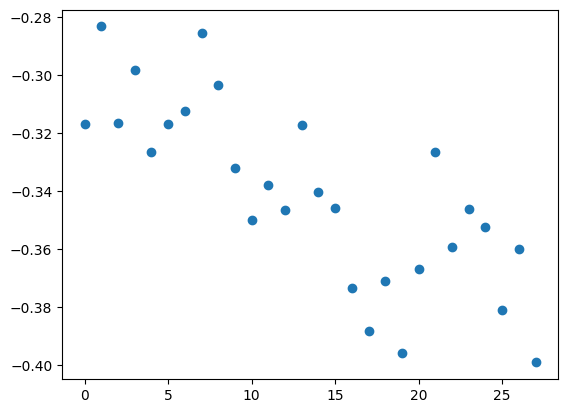

In [123]:
plt.plot(v_lim_r2, "o")

In [124]:
v_lim_r2_moyen = np.mean(v_lim_r2)
u_v_lim_r2 = np.std(v_lim_r2 , ddof =1) / np.sqrt(len(v_lim_r2))
print("La vitesse limite moyenne pour une bulle de diamètre (8,738 +/- 0,013) cm cm est (", v_lim_r2_moyen, "+/-",u_v_lim_r2,") m/s")

La vitesse limite moyenne pour une bulle de diamètre (8,738 +/- 0,013) cm cm est ( -0.34099517222991743 +/- 0.005986436248182364 ) m/s


In [125]:
# Pour les bulles de diamètre (2,875 +/- 0,015) cm (14, 16, 17)
v_lim_r3 = []
v_lim14 = []
v_lim16 = []
v_lim17 = []

#Vidéo 14 :
v_lim_141 = v_lim(tps141,pos141,0.05,0.7)[2]
v_lim_r3.append(v_lim_141)
v_lim14.append(v_lim_141)
v_lim_142 = v_lim(tps142,pos142,0.05,0.7)[2]
v_lim_r3.append(v_lim_142)
v_lim14.append(v_lim_142)
v_lim_143 = v_lim(tps143,pos143,0.05,0.7)[2]
v_lim_r3.append(v_lim_143)
v_lim14.append(v_lim_143)
v_lim_144 = v_lim(tps144,pos144,0.07,0.7)[2]
v_lim_r3.append(v_lim_144)
v_lim14.append(v_lim_144)
v_lim_145 = v_lim(tps145,pos145,0.05,0.7)[2]
v_lim_r3.append(v_lim_145)
v_lim14.append(v_lim_145)
v_lim_146 = v_lim(tps146,pos146,0.07,0.7)[2]
v_lim_r3.append(v_lim_146)
v_lim14.append(v_lim_146)
v_lim_146 = v_lim(tps146,pos146,0.05,0.7)[2]
v_lim_r3.append(v_lim_146)
v_lim14.append(v_lim_146)
v_lim14_moyen = np.mean(v_lim14)
u_v_lim14 = np.std(v_lim14, ddof =1) / np.sqrt(len(v_lim14))
print("La vitesse limite moyenne pour la vidéo 14 est (", v_lim14_moyen, "+/-", u_v_lim14,") m/s")

#Vidéo 16 :
v_lim_161 = v_lim(tps161,pos161,0.05, 0.5)[2]
v_lim_r3.append(v_lim_161)
v_lim16.append(v_lim_161)
v_lim_162 = v_lim(tps162,pos162,0.05, 0.5)[2]
v_lim_r3.append(v_lim_162)
v_lim16.append(v_lim_162)
v_lim_163 = v_lim(tps163,pos163,0.05, 0.5)[2]
v_lim_r3.append(v_lim_163)
v_lim16.append(v_lim_163)
v_lim_164 = v_lim(tps164,pos164,0.05, 0.5)[2]
v_lim_r3.append(v_lim_164)
v_lim16.append(v_lim_164)
v_lim_165 = v_lim(tps165,pos165,0.05, 0.5)[2]
v_lim_r3.append(v_lim_165)
v_lim16.append(v_lim_165)
v_lim16_moyen = np.mean(v_lim16)
u_v_lim16 = np.std(v_lim16, ddof =1) / np.sqrt(len(v_lim16))
print("La vitesse limite moyenne pour la vidéo 16 est (", v_lim16_moyen, "+/-", u_v_lim16,") m/s")

#Vidéo 17 :
v_lim_171 = v_lim(tps171,pos171,0.01,0.35)[2]
v_lim_r3.append(v_lim_171)
v_lim17.append(v_lim_171)
v_lim_172 = v_lim(tps172,pos172,0.01,0.35)[2]
v_lim_r3.append(v_lim_172)
v_lim17.append(v_lim_172)
v_lim_173 = v_lim(tps173,pos173,0.01,0.35)[2]
v_lim_r3.append(v_lim_173)
v_lim17.append(v_lim_173)
v_lim_174 = v_lim(tps174,pos174,0.01,0.35)[2]
v_lim_r3.append(v_lim_174)
v_lim17.append(v_lim_174)
v_lim17_moyen = np.mean(v_lim17)
u_v_lim17 = np.std(v_lim17, ddof =1) / np.sqrt(len(v_lim17))
print("La vitesse limite moyenne pour la vidéo 17 est (", v_lim17_moyen, "+/-", u_v_lim17,") m/s")

La vitesse limite moyenne pour la vidéo 14 est ( -0.2140268402002375 +/- 0.00901638136987654 ) m/s
La vitesse limite moyenne pour la vidéo 16 est ( -0.26399851748847514 +/- 0.025412246214260262 ) m/s
La vitesse limite moyenne pour la vidéo 17 est ( -0.6257602015486181 +/- 0.04591724665248516 ) m/s


In [126]:
v_lim_r3_moyen = np.mean(v_lim_r3)
u_v_lim_r3 = np.std(v_lim_r3 , ddof =1) / np.sqrt(len(v_lim_r3))
print("La vitesse limite moyenne pour une bulle de diamètre (.....6) cm est (", v_lim_r3_moyen, "+/-",u_v_lim_r3,") m/s")

La vitesse limite moyenne pour une bulle de diamètre (.....6) cm est ( -0.3325763296899069 +/- 0.04597781829013157 ) m/s


In [127]:
# Pour les bulles de diamètre (4,6064 +/- 0,0096) cm (18, 19, 21, 22)
v_lim_r4 = []
v_lim_r4b = []
v_lim18 = []
v_lim19 = []
v_lim21 = []
v_lim22 = []

#Vidéo 18 :
v_lim_181 = v_lim(tps181,pos181,0.25,0.8)[2]
v_lim_r4.append(v_lim_181)
v_lim18.append(v_lim_181)
v_lim_182 = v_lim(tps182,pos182,0.,0.6)[2]
v_lim_r4.append(v_lim_182)
v_lim18.append(v_lim_182)
v_lim_183 = v_lim(tps183,pos183,0.25,0.7)[2]
v_lim_r4.append(v_lim_183)
v_lim18.append(v_lim_183)
v_lim_184 = v_lim(tps184,pos184,0.35,0.7)[2]
v_lim_r4.append(v_lim_184)
v_lim18.append(v_lim_184)
v_lim18_moyen = np.mean(v_lim18)
u_v_lim18 = np.std(v_lim18, ddof =1) / np.sqrt(len(v_lim18))
print("La vitesse limite moyenne pour la vidéo 18 est (", v_lim18_moyen, "+/-", u_v_lim18,") m/s")

#Vidéo 19 :
v_lim_191 = v_lim(tps191,pos191,0.2,0.6)[2]
v_lim_r4.append(v_lim_191)
v_lim19.append(v_lim_191)
v_lim_192 = v_lim(tps192,pos192,0.,0.6)[2]
v_lim_r4.append(v_lim_192)
v_lim19.append(v_lim_192)
v_lim_193 = v_lim(tps193,pos193,0.,0.6)[2]
v_lim_r4.append(v_lim_193)
v_lim19.append(v_lim_193)
v_lim_194 = v_lim(tps194,pos194,0.,0.6)[2]
v_lim_r4.append(v_lim_194)
v_lim19.append(v_lim_194)
v_lim19_moyen = np.mean(v_lim19)
u_v_lim19 = np.std(v_lim19, ddof =1) / np.sqrt(len(v_lim19))
print("La vitesse limite moyenne pour la vidéo 19 est (", v_lim19_moyen, "+/-", u_v_lim19,") m/s")

#Vidéo 21 :
v_lim_211 = v_lim(tps211,pos211,0.1,1)[2]
v_lim_r4b.append(v_lim_211)
v_lim21.append(v_lim_211)
v_lim_212 = v_lim(tps212,pos212,0.,1)[2]
v_lim_r4b.append(v_lim_212)
v_lim21.append(v_lim_212)
v_lim_213 = v_lim(tps213,pos213,0.,1.2)[2]
v_lim_r4b.append(v_lim_213)
v_lim21.append(v_lim_213)
v_lim21_moyen = np.mean(v_lim21)
u_v_lim21 = np.std(v_lim21, ddof =1) / np.sqrt(len(v_lim21))
print("La vitesse limite moyenne pour la vidéo 21 est (", v_lim21_moyen, "+/-", u_v_lim21,") m/s")

#Vidéo 22 :
v_lim_221 = v_lim(tps221,pos221,0.2,0.8)[2]
v_lim_r4.append(v_lim_221)
v_lim22.append(v_lim_221)
v_lim_222 = v_lim(tps222,pos222,0.3,0.65)[2]
v_lim_r4b.append(v_lim_222)
v_lim22.append(v_lim_222)
v_lim_223 = v_lim(tps223,pos223,0.2,0.8)[2]
v_lim_r4b.append(v_lim_223)
v_lim22.append(v_lim_223)
v_lim_224 = v_lim(tps224,pos224,0.,0.75)[2]
v_lim_r4b.append(v_lim_224)
v_lim22.append(v_lim_224)
v_lim_225 = v_lim(tps225,pos225,0.15,0.75)[2]
v_lim_r4b.append(v_lim_225)
v_lim22.append(v_lim_225)
v_lim_226 = v_lim(tps226,pos226,0.1,0.6)[2]
v_lim_r4b.append(v_lim_226)
v_lim22.append(v_lim_226)
v_lim_227 = v_lim(tps227,pos227,0.15,0.6)[2]
v_lim_r4b.append(v_lim_227)
v_lim22.append(v_lim_227)
v_lim22_moyen = np.mean(v_lim22)
u_v_lim22 = np.std(v_lim22, ddof =1) / np.sqrt(len(v_lim22))
print("La vitesse limite moyenne pour la vidéo 22 est (", v_lim22_moyen, "+/-", u_v_lim22,") m/s")

La vitesse limite moyenne pour la vidéo 18 est ( -0.35335353906252 +/- 0.008767342811978735 ) m/s
La vitesse limite moyenne pour la vidéo 19 est ( -0.3904096392645777 +/- 0.014918871103137058 ) m/s
La vitesse limite moyenne pour la vidéo 21 est ( -0.1989668950456235 +/- 0.01684510308511659 ) m/s
La vitesse limite moyenne pour la vidéo 22 est ( -0.3368474883712446 +/- 0.010995886222460647 ) m/s


In [128]:
v_lim_r4_moyen = np.mean(v_lim_r4)
u_v_lim_r4 = np.std(v_lim_r4 , ddof =1) / np.sqrt(len(v_lim_r4))
print("La vitesse limite moyenne pour une bulle de diamètre (4,6064 +/- 0,0096) cm est (", v_lim_r4_moyen, "+/-",u_v_lim_r4,") m/s")

v_lim_r4b_moyen = np.mean(v_lim_r4b)
u_v_lim_r4b = np.std(v_lim_r4b , ddof =1) / np.sqrt(len(v_lim_r4b))
print("La vitesse limite moyenne pour une bulle de diamètre (..) cm est (", v_lim_r4b_moyen, "+/-",u_v_lim_r4b,") m/s")

La vitesse limite moyenne pour une bulle de diamètre (4,6064 +/- 0,0096) cm est ( -0.3627377156885748 +/- 0.013101912337710282 ) m/s
La vitesse limite moyenne pour une bulle de diamètre (..) cm est ( -0.2961384862052001 +/- 0.025458390184856305 ) m/s


In [129]:
# Pour les bulles de diamètre (6,68 +/- 0,11) cm (24, 25)
v_lim_r5 = []
v_lim24 = []
v_lim25 = []

#Vidéo 24 :
v_lim_241 = v_lim(tps241,pos241,0.,0.5)[2]
v_lim_r5.append(v_lim_241)
v_lim24.append(v_lim_241)
v_lim_242 = v_lim(tps242,pos242,0.,0.7)[2]
v_lim_r5.append(v_lim_242)
v_lim24.append(v_lim_242)
v_lim_243 = v_lim(tps243,pos243,0.,0.8)[2]
v_lim_r5.append(v_lim_243)
v_lim24.append(v_lim_243)
v_lim_244 = v_lim(tps244,pos244,0.15,0.8)[2]
v_lim_r5.append(v_lim_244)
v_lim24.append(v_lim_244)
v_lim_245 = v_lim(tps245,pos245,0.1,0.6)[2]
v_lim_r5.append(v_lim_245)
v_lim24.append(v_lim_245)
v_lim_246 = v_lim(tps246,pos246,0.1,0.7)[2]
v_lim_r5.append(v_lim_246)
v_lim24.append(v_lim_246)
v_lim_247 = v_lim(tps247,pos247,0.25,0.6)[2]
v_lim_r5.append(v_lim_247)
v_lim24.append(v_lim_247)
v_lim_248 = v_lim(tps248,pos248,0.2,0.7)[2]
v_lim_r5.append(v_lim_248)
v_lim24.append(v_lim_248)
v_lim_249 = v_lim(tps249,pos249,0.,0.6)[2]
v_lim_r5.append(v_lim_249)
v_lim24.append(v_lim_249)
v_lim_2410 = v_lim(tps2410,pos2410,0.2,0.7)[2]
v_lim_r5.append(v_lim_2410)
v_lim24.append(v_lim_2410)
v_lim24_moyen = np.mean(v_lim24)
u_v_lim24 = np.std(v_lim24, ddof =1) / np.sqrt(len(v_lim24))
print("La vitesse limite moyenne pour la vidéo 24 est (", v_lim24_moyen, "+/-", u_v_lim24,") m/s")

#Vidéo 25 :
v_lim_251 = v_lim(tps251,pos251,0.1,0.6)[2]
v_lim_r5.append(v_lim_251)
v_lim25.append(v_lim_251)
v_lim_252 = v_lim(tps252,pos252,0.2,0.8)[2]
v_lim_r5.append(v_lim_252)
v_lim25.append(v_lim_252)
v_lim_253 = v_lim(tps253,pos253,0.,0.8)[2]
v_lim_r5.append(v_lim_253)
v_lim25.append(v_lim_253)
v_lim_254 = v_lim(tps254,pos254,0.2,0.6)[2]
v_lim_r5.append(v_lim_254)
v_lim25.append(v_lim_254)
v_lim_255 = v_lim(tps255,pos255,0.2,0.6)[2]
v_lim_r5.append(v_lim_255)
v_lim25.append(v_lim_255)
v_lim_256 = v_lim(tps256,pos256,0.1,0.8)[2]
v_lim_r5.append(v_lim_256)
v_lim25.append(v_lim_251)
v_lim_257 = v_lim(tps257,pos257,0.2,0.7)[2]
v_lim_r5.append(v_lim_257)
v_lim25.append(v_lim_257)
v_lim_258 = v_lim(tps258,pos258,0.1,0.6)[2]
v_lim_r5.append(v_lim_258)
v_lim25.append(v_lim_258)
v_lim25_moyen = np.mean(v_lim25)
u_v_lim25 = np.std(v_lim25, ddof =1) / np.sqrt(len(v_lim25))
print("La vitesse limite moyenne pour la vidéo 25 est (", v_lim25_moyen, "+/-", u_v_lim25,") m/s")

La vitesse limite moyenne pour la vidéo 24 est ( -0.31013107442499255 +/- 0.007108646267547826 ) m/s
La vitesse limite moyenne pour la vidéo 25 est ( -0.32628584010464123 +/- 0.009698954559315536 ) m/s


In [130]:
v_lim_r5_moyen = np.mean(v_lim_r5)
u_v_lim_r5 = np.std(v_lim_r5, ddof=1) / np.sqrt(len(v_lim_r5))

print("La vitesse limite moyenne pour une bulle de diamètre (6,68 +/- 0,11) cm est (", v_lim_r5_moyen, "+/-", u_v_lim_r5, ") m/s")

La vitesse limite moyenne pour une bulle de diamètre (6,68 +/- 0,11) cm est ( -0.31487941705259875 +/- 0.005446607454682451 ) m/s


In [131]:
# Pour les bulles de diamètre (7,553 +/- 0,068) cm (26, 27) 
v_lim_r6= []
v_lim26 = []
v_lim27 = []

#Vidéo 26 :
v_lim_261 = v_lim(tps261, pos261, 0.2, 0.5)[2]
v_lim_r6.append(v_lim_261)
v_lim26.append(v_lim_261)
v_lim_262 = v_lim(tps262, pos262, 0.2, 0.8)[2]
v_lim_r6.append(v_lim_262)
v_lim26.append(v_lim_262)
v_lim_263 = v_lim(tps263, pos263, 0.1, 1.)[2]
v_lim_r6.append(v_lim_263)
v_lim26.append(v_lim_263)
v_lim_264 = v_lim(tps264, pos264, 0., 0.6)[2]
v_lim_r6.append(v_lim_264)
v_lim26.append(v_lim_264)
v_lim_265 = v_lim(tps265, pos265, 0.2, 0.6)[2]
v_lim_r6.append(v_lim_265)
v_lim26.append(v_lim_265)
v_lim_266 = v_lim(tps266, pos266, 0.4, 0.7)[2]
v_lim_r6.append(v_lim_266)
v_lim26.append(v_lim_266)
v_lim_267 = v_lim(tps267, pos267, 0., 1)[2]
v_lim_r6.append(v_lim_267)
v_lim26.append(v_lim_267)
v_lim_268 = v_lim(tps268, pos268, 0, 0.9)[2]
v_lim_r6.append(v_lim_268)
v_lim26.append(v_lim_268)
v_lim_269 = v_lim(tps269, pos269, 0, 1)[2]
v_lim_r6.append(v_lim_269)
v_lim26.append(v_lim_269)
v_lim_2610 = v_lim(tps2610, pos2610, 0, 1)[2]
v_lim_r6.append(v_lim_2610)
v_lim26.append(v_lim_2610)
v_lim26_moyen = np.mean(v_lim26)
u_v_lim26 = np.std(v_lim26, ddof=1) / np.sqrt(len(v_lim26))
print("La vitesse limite moyenne pour la vidéo 26 est (", v_lim26_moyen, "+/-", u_v_lim26, ") m/s")

#Vidéo 29 :
v_lim_271 = v_lim(tps271, pos271, 0, 0.8)[2]
v_lim_r6.append(v_lim_271)
v_lim27.append(v_lim_271)
v_lim_272 = v_lim(tps272, pos272, 0.42 ,1)[2]
v_lim_r6.append(v_lim_272)
v_lim27.append(v_lim_272)
v_lim_273 = v_lim(tps273, pos273, 0., 1)[2]
v_lim_r6.append(v_lim_273)
v_lim27.append(v_lim_273)
v_lim_274 = v_lim(tps274, pos274, 0., 1)[2]
v_lim_r6.append(v_lim_274)
v_lim27.append(v_lim_274)
v_lim_275 = v_lim(tps275, pos275, 0.1, 1)[2]
v_lim_r6.append(v_lim_275)
v_lim27.append(v_lim_275)
v_lim_276 = v_lim(tps276, pos276, 0., 0.7)[2]
v_lim_r6.append(v_lim_276)
v_lim27.append(v_lim_276)
v_lim_277 = v_lim(tps277, pos277, 0.15, 0.8)[2]
v_lim_r6.append(v_lim_277)
v_lim27.append(v_lim_277)
v_lim_278 = v_lim(tps278, pos278, 0.3, 0.6)[2]
v_lim_r6.append(v_lim_278)
v_lim27.append(v_lim_278)
v_lim_279 = v_lim(tps279, pos279, 0., 0.8)[2]
v_lim_r6.append(v_lim_279)
v_lim27.append(v_lim_279)
v_lim_2710 = v_lim(tps2710, pos2710, 0.2, 1)[2]
v_lim_r6.append(v_lim_2710)
v_lim27.append(v_lim_2710)
v_lim_2711 = v_lim(tps2711, pos2711, 0.3, 0.8)[2]
v_lim_r6.append(v_lim_2711)
v_lim27.append(v_lim_2711)
v_lim_2712 = v_lim(tps2712, pos2712, 0., 0.8)[2]
v_lim_r6.append(v_lim_2712)
v_lim27.append(v_lim_2712)
v_lim27_moyen = np.mean(v_lim27)
u_v_lim27 = np.std(v_lim27, ddof=1) / np.sqrt(len(v_lim27))
print("La vitesse limite moyenne pour la vidéo 27 est (", v_lim27_moyen, "+/-", u_v_lim27, ") m/s")

La vitesse limite moyenne pour la vidéo 26 est ( -0.23391285616474106 +/- 0.010263881174581017 ) m/s
La vitesse limite moyenne pour la vidéo 27 est ( -0.23719331591039486 +/- 0.00880866039808129 ) m/s


In [132]:
v_lim_r6_moyen = np.mean(v_lim_r6)
u_v_lim_r6 = np.std(v_lim_r6, ddof=1) / np.sqrt(len(v_lim_r6))

print("La vitesse limite moyenne pour une bulle de diamètre  (7,553 +/- 0,068) cm est (", v_lim_r6_moyen, "+/-", u_v_lim_r6, ") m/s")

La vitesse limite moyenne pour une bulle de diamètre  (7,553 +/- 0,068) cm est ( -0.2357021978441886 +/- 0.0065435870393161216 ) m/s


In [133]:
# Pour les bulles de diamètre (9,505 +/- 0,035) cm (28, 29, 30, 32)
v_lim_r7 = []
v_lim29 = []
v_lim30 = []
v_lim32 = []

#Vidéo 29 :
v_lim_291 = v_lim(tps291, pos291, 0.1, 1.)[2]
v_lim_r7.append(v_lim_291)
v_lim29.append(v_lim_291)
v_lim_292 = v_lim(tps292, pos292, 0.2, 0.8)[2]
v_lim_r7.append(v_lim_292)
v_lim29.append(v_lim_292)
v_lim_293 = v_lim(tps293, pos293, 0.2, 1.0)[2]
v_lim_r7.append(v_lim_293)
v_lim29.append(v_lim_293)
v_lim_294 = v_lim(tps294, pos294, 0.2, 0.8)[2]
v_lim_r7.append(v_lim_294)
v_lim29.append(v_lim_294)
v_lim_295 = v_lim(tps295, pos295, 0.1, 0.9)[2]
v_lim_r7.append(v_lim_295)
v_lim29.append(v_lim_295)
v_lim_296 = v_lim(tps296, pos296, 0.3, 1.2)[2]
v_lim_r7.append(v_lim_296)
v_lim29.append(v_lim_296)
v_lim29_moyen = np.mean(v_lim29)
u_v_lim29 = np.std(v_lim29, ddof=1) / np.sqrt(len(v_lim29))
print("La vitesse limite moyenne pour la vidéo 29 est (", v_lim29_moyen, "+/-", u_v_lim29, ") m/s")

#Vidéo 30 :
v_lim_301 = v_lim(tps301, pos301, 0.1, 1.1)[2]
v_lim_r7.append(v_lim_301)
v_lim30.append(v_lim_301)
v_lim_302 = v_lim(tps302, pos302, 0.5, 1)[2]
v_lim_r7.append(v_lim_302)
v_lim30.append(v_lim_302)
v_lim_303 = v_lim(tps303, pos303, 0., 1.0)[2]
v_lim_r7.append(v_lim_303)
v_lim30.append(v_lim_303)
v_lim_304 = v_lim(tps304, pos304, 0.0, 1.2)[2]
v_lim_r7.append(v_lim_304)
v_lim30.append(v_lim_304)
v_lim_305 = v_lim(tps305, pos305, 0., 1.2)[2]
v_lim_r7.append(v_lim_305)
v_lim30.append(v_lim_305)
v_lim_306 = v_lim(tps306, pos306, 0., 1.2)[2]
v_lim_r7.append(v_lim_306)
v_lim30.append(v_lim_306)
v_lim30_moyen = np.mean(v_lim30)
u_v_lim30 = np.std(v_lim30, ddof=1) / np.sqrt(len(v_lim30))
print("La vitesse limite moyenne pour la vidéo 30 est (", v_lim30_moyen, "+/-", u_v_lim30, ") m/s")

#Vidéo 32 :
v_lim_321 = v_lim(tps321, pos321, 0., 1.4)[2]
v_lim_r7.append(v_lim_321)
v_lim32.append(v_lim_321)
v_lim_322 = v_lim(tps322, pos322, 0., 1.)[2]
v_lim_r7.append(v_lim_322)
v_lim32.append(v_lim_322)
v_lim_323 = v_lim(tps323, pos323, 0.4, 1.1)[2]
v_lim_r7.append(v_lim_323)
v_lim32.append(v_lim_323)
v_lim_324 = v_lim(tps324, pos324, 0.1, 1.)[2]
v_lim_r7.append(v_lim_324)
v_lim32.append(v_lim_324)
v_lim_325 = v_lim(tps325, pos325, 0.2, 1)[2]
v_lim_r7.append(v_lim_325)
v_lim32.append(v_lim_325)
v_lim_326 = v_lim(tps326, pos326, 0.2, 1.1)[2]
v_lim_r7.append(v_lim_326)
v_lim32.append(v_lim_326)
v_lim32_moyen = np.mean(v_lim32)
u_v_lim32 = np.std(v_lim32, ddof=1) / np.sqrt(len(v_lim32))
print("La vitesse limite moyenne pour la vidéo 32 est (", v_lim32_moyen, "+/-", u_v_lim32, ") m/s")

La vitesse limite moyenne pour la vidéo 29 est ( -0.15300586549202935 +/- 0.014036151969917957 ) m/s
La vitesse limite moyenne pour la vidéo 30 est ( -0.14743883907941677 +/- 0.010282333835684599 ) m/s
La vitesse limite moyenne pour la vidéo 32 est ( -0.1495303674831503 +/- 0.009958795400541117 ) m/s


In [134]:
v_lim_r7_moyen = np.mean(v_lim_r7)
u_v_lim_r7 = np.std(v_lim_r7, ddof=1) / np.sqrt(len(v_lim_r7))

print("La vitesse limite moyenne pour une bulle de diamètre  (9,505 +/- 0,035) cm est (", v_lim_r7_moyen, "+/-", u_v_lim_r7, ") m/s")

La vitesse limite moyenne pour une bulle de diamètre  (9,505 +/- 0,035) cm est ( -0.14999169068486545 +/- 0.0063018872142051804 ) m/s


In [135]:
# Pour les bulles de diamètre (12,736 +/- 0,092), montée (34 - 35)
v_lim_r8 = []
v_lim34_m = []
v_lim35_m = []

# Vidéo 34 - Montée :
v_lim_3410 = v_lim(tps3410, pos3410, 0., 1.)[2]
v_lim_r8.append(v_lim_3410)
v_lim34_m.append(v_lim_3410)
v_lim_3411 = v_lim(tps3411, pos3411, 0., 1.)[2]
v_lim_r8.append(v_lim_3411)
v_lim34_m.append(v_lim_3411)
v_lim_3412 = v_lim(tps3412, pos3412, 0., 1.)[2]
v_lim_r8.append(v_lim_3412)
v_lim34_m.append(v_lim_3412)
v_lim_3413 = v_lim(tps3413, pos3413, 0., 1.)[2]
v_lim_r8.append(v_lim_3413)
v_lim34_m.append(v_lim_3413)
v_lim34_m_moyen = np.mean(v_lim34_m)
u_v_lim34_m = np.std(v_lim34_m, ddof=1) / np.sqrt(len(v_lim34_m))
print("La vitesse limite moyenne pour la vidéo 34 (montée) est (", v_lim34_m_moyen, "+/-", u_v_lim34_m, ") m/s")

# Vidéo 35 - Montée :
v_lim_3510 = v_lim(tps35d1[:15], pos35d1[:15], 0., 1.1)[2]
v_lim_r8.append(v_lim_3510)
v_lim35_m.append(v_lim_3510)
v_lim_3511 = v_lim(tps35d2[:11], pos35d2[:11], 0., 0.65)[2]
v_lim_r8.append(v_lim_3511)
v_lim35_m.append(v_lim_3511)
v_lim_3512 = v_lim(tps35d3, pos35d3, 0., 1.)[2]
v_lim_r8.append(v_lim_3512)
v_lim35_m.append(v_lim_3512)
v_lim_3513 = v_lim(tps35d4, pos35d4, 0., 1.3)[2]
v_lim_r8.append(v_lim_3513)
v_lim35_m.append(v_lim_3513)
v_lim35_m_moyen = np.mean(v_lim35_m)
u_v_lim35_m = np.std(v_lim35_m, ddof=1) / np.sqrt(len(v_lim35_m))
print("La vitesse limite moyenne pour la vidéo 35 (montée) est (", v_lim35_m_moyen, "+/-", u_v_lim35_m, ") m/s")

La vitesse limite moyenne pour la vidéo 34 (montée) est ( 0.09932488849413673 +/- 0.003452899613018025 ) m/s
La vitesse limite moyenne pour la vidéo 35 (montée) est ( 0.10166025755943214 +/- 0.012635627294480143 ) m/s


In [136]:
v_lim_r8_moyen = np.mean(v_lim_r8)
u_v_lim_r8 = np.std(v_lim_r8, ddof=1) / np.sqrt(len(v_lim_r8))

print("La vitesse limite moyenne (partie montée) pour une bulle de diamètre  (12,736 +/- 0,092) cm est (", v_lim_r8_moyen, "+/-", u_v_lim_r8, ") m/s")

La vitesse limite moyenne (partie montée) pour une bulle de diamètre  (12,736 +/- 0,092) cm est ( 0.10049257302678444 +/- 0.006079660193296426 ) m/s


In [137]:
# Pour les bulles de diamètre (12,736 +/- 0,092), descente (34 - 35)
v_lim_r9 = []
v_lim34_d = []
v_lim35_d = []

# Vidéo 34 - Descente :
v_lim_342 = v_lim(tps342, pos342, 1., 5.)[2]
v_lim_r9.append(v_lim_342)
v_lim34_d.append(v_lim_342)
v_lim_343 = v_lim(tps343, pos343, 2.5, 6.)[2]
v_lim_r9.append(v_lim_343)
v_lim34_d.append(v_lim_343)
v_lim_344 = v_lim(tps344, pos344, 0.5, 3.)[2]
v_lim_r9.append(v_lim_344)
v_lim34_d.append(v_lim_344)
v_lim_345 = v_lim(tps345, pos345, 0., 3.)[2]
v_lim_r9.append(v_lim_345)
v_lim34_d.append(v_lim_345)
v_lim_346 = v_lim(tps346, pos346, 0., 3.)[2]
v_lim_r9.append(v_lim_346)
v_lim34_d.append(v_lim_346)
v_lim_347 = v_lim(tps347, pos347, 0., 3.)[2]
v_lim_r9.append(v_lim_347)
v_lim34_d.append(v_lim_347)
v_lim_348 = v_lim(tps348, pos348, 0., 2.5)[2]
v_lim_r9.append(v_lim_348)
v_lim34_d.append(v_lim_348)
v_lim_349 = v_lim(tps349, pos349, 0., 0.9)[2]
v_lim_r9.append(v_lim_349)
v_lim34_d.append(v_lim_349)

v_lim34_d_moyen = np.mean(v_lim34_d)
u_v_lim34_d = np.std(v_lim34_d, ddof=1) / np.sqrt(len(v_lim34_d))
print("La vitesse limite moyenne pour la vidéo 34 (descente) est (", v_lim34_d_moyen, "+/-", u_v_lim34_d, ") m/s")

# Vidéo 35 - Descente :
v_lim_351 = v_lim(tps35m1[:15], pos35m1[:15], 0., 2)[2]
v_lim_r9.append(v_lim_351)
v_lim35_d.append(v_lim_351)
v_lim_352 = v_lim(tps35m2[:11], pos35m2[:11], 0.4, 1.2)[2]
v_lim_r9.append(v_lim_352)
v_lim35_d.append(v_lim_352)
v_lim_353 = v_lim(tps35m3[:-10], pos35m3[:-10], 0., 1.5)[2]
v_lim_r9.append(v_lim_353)
v_lim35_d.append(v_lim_353)
v_lim_354 = v_lim(ini(tps35m3[-10:]), pos35m3[-10:], 0., 1.1)[2]
v_lim_r9.append(v_lim_354)
v_lim35_d.append(v_lim_354)
v_lim35_d_moyen = np.mean(v_lim35_d)
u_v_lim35_d = np.std(v_lim35_d, ddof=1) / np.sqrt(len(v_lim35_d))
print("La vitesse limite moyenne pour la vidéo 35 (descente) est (", v_lim35_d_moyen, "+/-", u_v_lim35_d, ") m/s")

La vitesse limite moyenne pour la vidéo 34 (descente) est ( -0.021431735306532026 +/- 0.004731775582570076 ) m/s
La vitesse limite moyenne pour la vidéo 35 (descente) est ( -0.05836001755559708 +/- 0.0017345540835515302 ) m/s


In [138]:
v_lim_r9_moyen = np.mean(v_lim_r9)
u_v_lim_r9 = np.std(v_lim_r9, ddof=1) / np.sqrt(len(v_lim_r9))

print("La vitesse limite moyenne (partie descente) pour une bulle de diamètre  (12,736 +/- 0,092) cm est (", v_lim_r9_moyen, "+/-", u_v_lim_r9, ") m/s")

La vitesse limite moyenne (partie descente) pour une bulle de diamètre  (12,736 +/- 0,092) cm est ( -0.03374116272288704 +/- 0.006109143310993977 ) m/s


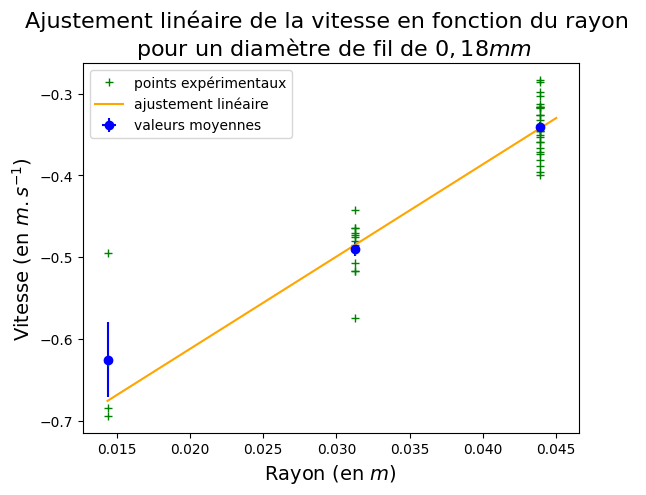

In [139]:
tab_dia1 = np.array([tab_1_moy, tab_2_moy, tab_3_moy])/2
tab_vit1 = np.array([v_lim_r1_moyen, v_lim_r2_moyen, np.mean(v_lim17)])
tab_udia1 = np.array([u_tab_1, u_tab_2, u_tab_3])/2
tab_uvit1 = np.array([u_v_lim_r1, u_v_lim_r2, np.mean(u_v_lim17)])

tab_dia1b = np.concatenate((np.ones(len(v_lim_r1))*tab_1_moy, np.ones(len(v_lim_r2))*tab_2_moy, np.ones(len(v_lim17))*tab_3_moy), axis=0)/2
tab_vit1b = np.concatenate((v_lim_r1, v_lim_r2, v_lim17), axis=0)

res1 = fu.linfitxy(tab_dia1, tab_vit1, dx=tab_udia1, dy=tab_uvit1, intercept=True, plot=False)
x = np.linspace(tab_dia1b[-1], 0.045, 100)
y = res1[0]*x + res1[1]
plt.figure()
plt.errorbar(tab_dia1, tab_vit1, xerr=tab_udia1, yerr=tab_uvit1, color='blue', fmt='o', label='valeurs moyennes')
plt.plot(tab_dia1b, tab_vit1b, '+', color='green', label='points expérimentaux')
plt.plot(x, y, color='orange', label='ajustement linéaire')
plt.xlabel(r'Rayon (en $m$)', fontsize=14)
plt.ylabel(r'Vitesse (en $m.s^{-1}$)', fontsize=14)
plt.title('Ajustement linéaire de la vitesse en fonction du rayon \n pour un diamètre de fil de $0,18 mm$', fontsize=16)
plt.legend()
plt.savefig('fig_vit_ray18')
plt.show()

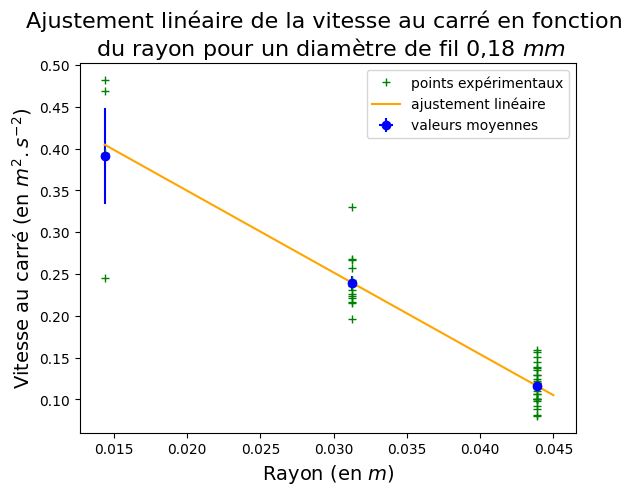

In [140]:
tab_uvit1_c = np.abs(np.array([u_v_lim_r1, u_v_lim_r2, np.mean(u_v_lim17)])*tab_vit1*2)
res2 = fu.linfitxy(tab_dia1, tab_vit1**2, dx=tab_udia1, dy=tab_uvit1_c, intercept=True, plot=False)
y2 = res2[0]*x + res2[1]

plt.figure()
plt.errorbar(tab_dia1, tab_vit1**2, xerr=tab_udia1, yerr=tab_uvit1_c, color='blue', fmt='o', label='valeurs moyennes')
plt.plot(tab_dia1b, tab_vit1b**2, '+', color='green', label='points expérimentaux')
plt.plot(x, y2, color='orange', label='ajustement linéaire')
plt.xlabel(r'Rayon (en $m$)', fontsize=14)
plt.ylabel(r"Vitesse au carré (en $m^2.s^{-2}$)", fontsize=14)
plt.title('Ajustement linéaire de la vitesse au carré en fonction \n du rayon pour un diamètre de fil 0,18 $mm$',   fontsize=16)
plt.legend()
plt.savefig('fig_vit2_ray18')
plt.show()

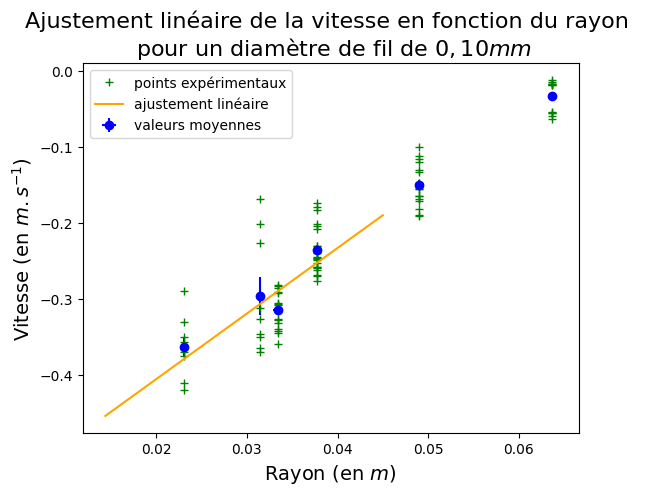

In [141]:
tab_dia2 = np.array([tab_4_moy, tab_5_moy, tab_6_moy, tab_7_moy, tab_8_moy, tab_9_moy])/2
tab_vit2 = np.array([v_lim_r4_moyen, v_lim_r4b_moyen, v_lim_r5_moyen, v_lim_r6_moyen, v_lim_r7_moyen, v_lim_r9_moyen])
tab_udia2 = np.array([u_tab_4, u_tab_5, u_tab_6, u_tab_7, u_tab_8, u_tab_9])/2
tab_uvit2 = np.array([u_v_lim_r4, u_v_lim_r4b, u_v_lim_r5, u_v_lim_r6, u_v_lim_r7, u_v_lim_r9])

tab_dia2b = np.concatenate((np.ones(len(v_lim_r4))*tab_4_moy, np.ones(len(v_lim_r4b))*tab_5_moy, np.ones(len(v_lim_r5))*tab_6_moy, np.ones(len(v_lim_r6))*tab_7_moy, np.ones(len(v_lim_r7))*tab_8_moy, np.ones(len(v_lim_r9))*tab_9_moy), axis=0)/2
tab_vit2b = np.concatenate((v_lim_r4, v_lim_r4b, v_lim_r5, v_lim_r6, v_lim_r7, v_lim_r9), axis=0)


res3 = fu.linfitxy(tab_dia2, tab_vit2, dx=tab_udia2, dy=tab_uvit2, intercept=True, plot=False)
y2b = res3[0]*x + res3[1]

plt.figure()
plt.errorbar(tab_dia2, tab_vit2, xerr=tab_udia2, yerr=tab_uvit2, color='blue', fmt='o', label='valeurs moyennes')
plt.plot(tab_dia2b, tab_vit2b, '+', color='green', label='points expérimentaux')
plt.plot(x, y2b, color='orange', label='ajustement linéaire')
plt.xlabel(r'Rayon (en $m$)', fontsize=14)
plt.ylabel(r"Vitesse (en $m.s^{-1}$)", fontsize=14)
plt.title('Ajustement linéaire de la vitesse en fonction du rayon \n pour un diamètre de fil de $0,10 mm$', fontsize=16)
plt.legend()
plt.savefig('fig_vit_ray10')
plt.show()

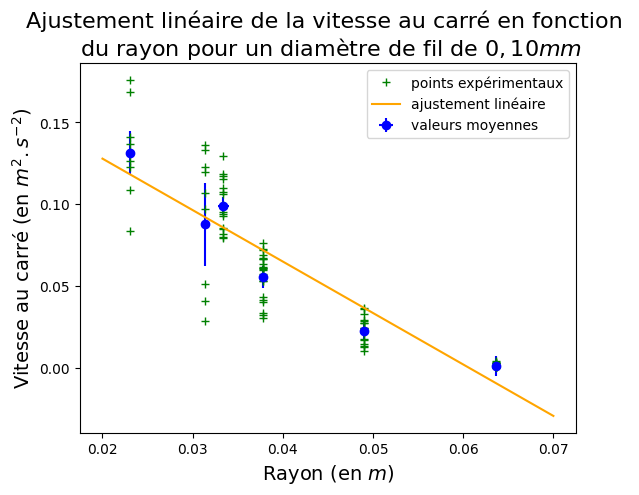

In [142]:
tab_uvit2_c = np.abs([u_v_lim_r4, u_v_lim_r4b, u_v_lim_r5, u_v_lim_r6, u_v_lim_r7, u_v_lim_r9])

res4 = fu.linfitxy(tab_dia2, tab_vit2**2, dx=tab_udia2, dy=tab_uvit2_c, intercept=True, plot=False)
xb = np.linspace(0.02, 0.07, 100)
yb = res4[0]*xb + res4[1]
plt.figure()
plt.errorbar(tab_dia2, tab_vit2**2, xerr=tab_udia2, yerr=tab_uvit2_c, color='blue', fmt='o', label='valeurs moyennes')
plt.plot(tab_dia2b, tab_vit2b**2, '+', color='green', label='points expérimentaux')
plt.plot(xb, yb, color='orange', label='ajustement linéaire')
plt.xlabel(r'Rayon (en $m$)', fontsize=14)
plt.ylabel(r'Vitesse au carré (en $m^2.s^{-2}$)', fontsize=14)
plt.title('Ajustement linéaire de la vitesse au carré en fonction \n du rayon pour un diamètre de fil de $0,10 mm$ ', fontsize=16)
plt.legend()
plt.savefig('fig_vit2_ray10')
plt.show()

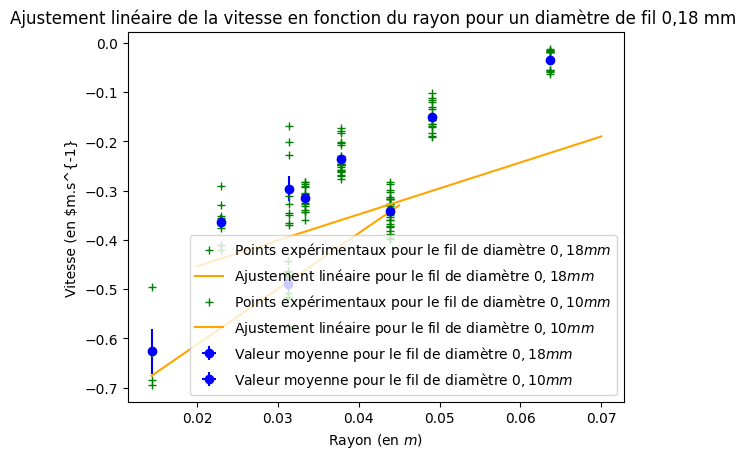

In [143]:
#graphes reunit :

plt.figure()
plt.errorbar(tab_dia1, tab_vit1, xerr=tab_udia1, yerr=tab_uvit1, color='blue', fmt='o', label='Valeur moyenne pour le fil de diamètre $0,18mm$')
plt.plot(tab_dia1b, tab_vit1b, '+', color='green', label='Points expérimentaux pour le fil de diamètre $0,18mm$')
plt.plot(x, y, color='orange', label='Ajustement linéaire pour le fil de diamètre $0,18mm$')
plt.errorbar(tab_dia2, tab_vit2, xerr=tab_udia2, yerr=tab_uvit2, color='blue', fmt='o', label='Valeur moyenne pour le fil de diamètre $0,10mm$')
plt.plot(tab_dia2b, tab_vit2b, '+', color='green', label='Points expérimentaux pour le fil de diamètre $0,10mm$')
plt.plot(xb, y2b, color='orange', label='Ajustement linéaire pour le fil de diamètre $0,10mm$')
plt.xlabel(r'Rayon (en $m$)')
plt.ylabel(r'Vitesse (en $m.s^{-1}')
plt.title('Ajustement linéaire de la vitesse en fonction du rayon pour un diamètre de fil 0,18 mm ')
plt.legend()
plt.show()

In [144]:
# Fonctions :

heta_sur = 2*0.00000001

## Profil épaisseur 
def prof_ep0(tab_haut, premiere_raie=0):
    """Tableau qui prend dans l'ordre les couleurs : Noir, Blanc, Jaune, Bleu, Jaune, Violet, Bleu, Jaune, Violet, Vert, Violet, Vert, Violet, Vert, Violet"""
    tab_epmin = np.array([0, 86, 129, 228, 281, 320, 388, 428, 544, 629, 693, 798, 896, 1013, 1124, 1245])/1000000000
    tab_epmax = np.array([0, 101, 150, 241, 285, 329, 393, 444, 553, 645, 730, 820, 922, 1052, 1152, 1270])/1000000000
    tab_ep = (tab_epmax + tab_epmin)/2
    n = len(tab_haut)
    tab_ep2 = tab_ep[premiere_raie : n+premiere_raie]

    res = opt.curve_fit(fe, tab_haut, tab_ep2)
    return res[0]

def prof_ep1(tab_haut_min, tab_haut_max, premiere_raie=0):
    tab_haut = (tab_haut_min + tab_haut_max)/2
    res = prof_ep0(tab_haut, premiere_raie)
    return res

## Fonction paramètres drainage
def drainage(tab_tab, tab_tps, tab_color):
    if (( (len(tab_tab) != len(tab_tps)) or (len(tab_tab) != len(tab_color)) )):
        print("Il y a un problème de dimensions dans les tableaux")
    for i in tab_tab:
        if len(tab_tab[i] > 14) :
            print("Il y a un problème dans le pointage")
    
    tab_a = []
    tab_b = []

    for j in range(0, len(tab_tab)):
        res = prof_ep0(tab_tab[j], tab_couleur[j])
        tab_a.append(res[0])
        tab_b.append(res[2])
    
    return tab_tps, tab_a, tab_b

## Fonction poussée d'Archimède
def pi_moy0(tab_tps, tab_pos, t_min, t_max, r_bulle, tab_haut_min, tab_haut_max, premiere_raie=0):
    rho_air = 1.2
    g = 9.81
    res = v_lim(tab_tps, tab_pos, t_min, t_max)
    tab_pos2 = res[2]
    tab_tps2 = res[0]
    res2 = prof_ep0(tab_haut_min, premiere_raie)
    a = res2[0]
    b = res2[1]
    tab_pi = rho_air*g*np.pi*(r_bulle**2)*a*np.exp(-tab_pos2/b)
    moy_pi = np.mean(tab_pi)
    return tab_tps2, tab_pi, moy_pi

def pi_moy1(tab_tps, tab_pos, t_min, t_max, r_bulle, tab_haut, premiere_raie=0):
    rho_air = 1.2
    g = 9.81
    res = v_lim(tab_tps, tab_pos, t_min, t_max)
    tab_pos2 = res[2]
    tab_tps2 = res[0]
    res2 = prof_ep1(tab_haut, premiere_raie)
    a = res2[0]
    b = res2[1]
    tab_pi = rho_air*g*np.pi*(r_bulle**2)*a*np.exp(-tab_pos2/b)
    moy_pi = np.mean(tab_pi)
    return tab_tps2, tab_pi, moy_pi

def v_pro(tab_vlim, v_lim):
    tab_ecart = np.abs(np.array(tab_vlim) - v_lim)
    k=0
    for i in range(1, len(tab_vlim)-1):
        if (tab_ecart[k] > tab_ecart[i]):
            k = i
    return k

In [145]:
#Valeurs :
rho_eau = 1000
rho_glycerol = 1260
rho_savon = 1020
rho_solution = 0.9 * rho_eau + 0.05 * rho_glycerol + 0.05 * rho_savon
d_fil_1 = 0.18/1000
d_fil_2 = 0.1/1000
e = 10**(-6)
ue = (1.4*10**(-6))/np.sqrt(12)

In [149]:
# coefficient si les frottements sont proportionnels à v :
alpha1 = -((np.pi**2)*(d_fil_1**2)*rho_fil*g)/(2*res1[1])
ualpha1 = alpha1*np.abs(res1[3]/res1[1])
alpha1bis = (np.pi*(10**(-6))*rho_solution*g)/res1[0]
ualpha1bis = np.abs(alpha1bis*np.sqrt(  (res1[2]/res1[0])**2 + (ue/e)**2))

alpha2 = -((np.pi**2)*(d_fil_2**2)*rho_fil*g)/(2*res3[1])
ualpha2 = alpha1*np.abs(res3[3]/res3[1])
alpha2bis = (np.pi*(10**(-6))*rho_solution*g)/res3[0]
ualpha2bis = alpha2bis*np.abs(np.sqrt(  (res3[2]/res3[0])**2 + (ue/e)**2))

print("alpha1 =", alpha1, "ualpha1 = ", ualpha1, "\n alpha1' =",alpha1bis, "ualpha1' =",ualpha1bis, "\n alpha2 =", alpha2, "ualpha2 =",ualpha2, "\n alpha2' =",alpha2bis, "ualpha2, =",ualpha2bis, '\n')

# coefficient si les frottements sont proportionnels à v^2 :
beta1 = (np.pi**2 * (d_fil_1**2) * rho_fil * g)/(2*res2[1])
ubeta1 = beta1*res2[3]/res2[1]
beta1bis = -(np.pi * g*e*rho_fil)/(res2[0])
ubeta1bis = beta1bis*np.sqrt(  (res2[2]/res2[0])**2 + (ue/e)**2)

beta2 = (np.pi**2 * (d_fil_1 **2) * rho_fil * g)/(2*res4[1])
ubeta2 = beta2*res4[3]/res4[1]
beta2bis = -(np.pi * g*e*rho_fil)/(res4[0])
ubeta2bis = beta2bis*np.sqrt(  (res4[2]/res4[0])**2 + (ue/e)**2)

print("beta1 = ", beta1, "ubeta1 = ", ubeta1, "\n beta1' = ", beta1bis, "ubeta1' = ", ubeta1bis,"\n beta2 = ",  beta2, "ubeta2 = ", ubeta2, "\n beta2' = ", beta2bis, "ubeta2' = ", ubeta2bis, '\n')
#print(res1, res2, res3, res4)

z1=np.abs(alpha1 - alpha1bis)/np.sqrt(ualpha1**2 + ualpha1bis**2)
z2=np.abs(alpha2 - alpha2bis)/np.sqrt(ualpha2**2 + ualpha2bis**2)
z3=np.abs(beta1 - beta1bis)/np.sqrt(ubeta1**2 + ubeta1bis**2)
z4=np.abs(beta2 - beta2bis)/np.sqrt(ubeta2**2 + ubeta2bis**2)

print("test dia1 prop v =", z1, "\n test dia2 prop v =", z2, "\n test dia1 prop v^2 =", z3, "\n test dia2 prop v^2 =", z4)

alpha1 = 0.002114117074145715 ualpha1 =  7.845692602329462e-05 
 alpha1' = 0.002765363791910164 ualpha1' = 0.0011330764344956096 
 alpha2 = 0.0009474351038026543 ualpha2 = 4.495864301389872e-05 
 alpha2' = 0.003629557309506743 ualpha2, = 0.0014711193783169504 

beta1 =  0.0032503697083598377 ubeta1 =  0.00017296562046044452 
 beta1' =  0.0035598002780905798 ubeta1' =  0.0014604674608992957 
 beta2 =  0.009287940284397197 ubeta2 =  0.0004828163195481441 
 beta2' =  0.01106485006594785 ubeta2' =  0.004533705885151501 

test dia1 prop v = 0.5733868301771252 
 test dia2 prop v = 1.822333807764927 
 test dia1 prop v^2 = 0.21040050246500158 
 test dia2 prop v^2 = 0.38972942393470644


In [147]:
mu_liq = 10**(-3)
mu_surf = 10**(-8)

mu = mu_liq+2*mu_surf/e

def Re(vitesse, rayon, rho = rho_solution, mu = mu):
    return rho*vitesse*2*rayon/mu

print(Re(np.absolute(tab_vit1), tab_dia1))
print(Re(np.absolute(tab_vit2), tab_dia2))

[1477.97116884 1444.31421344  868.71714687]
[ 806.82066006  898.55047807 1016.02363869  859.56087623  710.13597454
  207.49927947]


In [154]:
alpham1 = (alpha1+alpha1bis)/2
alpham2 = (alpha2+alpha2bis)/2

betam1 = (beta1+beta1bis)/2
betam2 = (beta2+beta2bis)/2

#Préfacteur
pf1 = alpham1/mu
pf2 = alpham2/mu

#Coefficient de trainée
cd1 = betam1/(rho_solution*2*e)
cd2 = betam2/(rho_solution*2*e)

print(pf1, pf2, cd1, cd2)

0.1161781158584733 0.10897600984069993 1.6790359927146001 5.017946338842467
0.0264
